# MachineLearning Project on Alzheimers Disease and Healthy Aging

## Predicting The Cause of Occuring AlzheimersDisease

<img src="alzheimers">

## Table of Contents

1.Introduction
2.Goal Of The Project
3.Data PreProcessing
4.Data Story
5.Conclusion

## Steps in Data Preprocessing

1.Acquire the dataset 2.Importing the libraries 3.Importing the dataset 4.Finding the Missing data 5.Finding and handling outliers 6.Encoding the categorical data 7.Featuring selection 8.Splitting the dataset 9.Feature scaling.

### Importance of Data Preprocessing or Data cleaning:
Data cleaning refers to the process of removing unwanted variables and values from our dataset and getting rid of any irregularities in it.Such irregularities can disproportionality skew our data and hence adversely effect the result. Gaining general knowledge about the data including its values, kinds, number of rows and columns, and missing values is the primary objective of data understanding.

### 1. DATASET:

https://healthdata.gov/dataset/Alzheimer-s-Disease-and-Healthy-Aging-Data

### Dataset Desription

The Alzheimer-s-Disease-and-Healthy-Aging-Dataset contains 284142 rows and 31 columns.

### 2.Importing All Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### 3.Loading The Dataset

In [3]:
# import dataset
df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
df

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


### Understanding The Data

In [5]:
#Displays the shape of the data-no.of rows and columns
df.shape

(284142, 31)

In [7]:
#Displays the first 5 rows
df.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [9]:
#Displays the last 5 rows
df.tail()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS
284141,BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,%,...,Native Am/Alaskan Native,POINT (-108.1098304 43.23554134),C02,TNC02,Q02,56,AGE,5064,RACE,NAA


In [11]:
#facilitates comprehension of the data type and related information, such as the quantity of records in each column,
#whether the data is null or not, the type of data, and the dataset’s memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284142 entries, 0 to 284141
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       284142 non-null  object 
 1   YearStart                   284142 non-null  int64  
 2   YearEnd                     284142 non-null  int64  
 3   LocationAbbr                284142 non-null  object 
 4   LocationDesc                284142 non-null  object 
 5   Datasource                  284142 non-null  object 
 6   Class                       284142 non-null  object 
 7   Topic                       284142 non-null  object 
 8   Question                    284142 non-null  object 
 9   Data_Value_Unit             284142 non-null  object 
 10  DataValueTypeID             284142 non-null  object 
 11  Data_Value_Type             284142 non-null  object 
 12  Data_Value                  192808 non-null  float64
 13  Data_Value_Alt

**DATASET OVERVIEW:** .284142 rows(entries) .31 columns(features -.Mix of integers(3),float64(4),object(24) data types.

In [13]:
#Display the features of the dataset
df.columns

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

In [15]:
#statistical summary of the data set which gives the count, mean, standard deviation, minimum,
#and quartiles for each numerical column. The dataset’s central tendencies and spread are briefly summarized.
df.describe()

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,284142.000000,284142.000000,192808.000000,192808.000000,192597.000000,192597.000000,284142.000000
mean,2018.596065,2018.657735,37.676757,37.676757,33.027824,42.595333,800.322677
std,2.302815,2.360105,25.213484,25.213484,24.290016,26.156408,2511.564977
min,2015.000000,2015.000000,0.000000,0.000000,-0.700000,1.300000,1.000000
25%,2017.000000,2017.000000,15.900000,15.900000,12.600000,19.700000,19.000000
50%,2019.000000,2019.000000,32.800000,32.800000,27.000000,38.900000,34.000000
75%,2021.000000,2021.000000,56.900000,56.900000,49.400000,64.600000,49.000000
max,2022.000000,2022.000000,100.000000,100.000000,99.600000,100.000000,9004.000000


### 4.Finding and Handling the Missing Values

In [17]:
#displays the  no.of null values(if there) in each columns
df.isnull().sum()

RowId                              0
YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
Datasource                         0
Class                              0
Topic                              0
Question                           0
Data_Value_Unit                    0
DataValueTypeID                    0
Data_Value_Type                    0
Data_Value                     91334
Data_Value_Alt                 91334
Data_Value_Footnote_Symbol    174166
Data_Value_Footnote           174166
Low_Confidence_Limit           91545
High_Confidence_Limit          91545
StratificationCategory1            0
Stratification1                    0
StratificationCategory2        36873
Stratification2                36873
Geolocation                    30489
ClassID                            0
TopicID                            0
QuestionID                         0
LocationID                         0
S

In [19]:
df1=df.copy()
df1.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


### Checking duplicates

Detecting duplicates using duplicated() function.

In [21]:
df1.duplicated().sum()

0

**Handling Missing Values Using any measures(removing/ replace the values with mean/median/mode)**.

In [23]:
df1.fillna(df1.Data_Value .mean())

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


In [25]:
df1.fillna(df1.Data_Value_Alt.median())

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE,2016,2016,WI,Wisconsin,BRFSS,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,%,...,"Black, non-Hispanic",POINT (-89.81637074 44.39319117),C03,TSC02,Q15,55,AGE,AGE_OVERALL,RACE,BLK
284138,BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE,2017,2017,WY,Wyoming,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,...,Hispanic,POINT (-108.1098304 43.23554134),C01,TOC13,Q45,56,AGE,5064,RACE,HIS
284139,BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE,2015,2015,WY,Wyoming,BRFSS,Cognitive Decline,Talked with health care professional about sub...,Percentage of older adults with subjective cog...,%,...,Asian/Pacific Islander,POINT (-108.1098304 43.23554134),C06,TCC04,Q42,56,AGE,AGE_OVERALL,RACE,ASN
284140,BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE,2019,2019,WV,West Virginia,BRFSS,Overall Health,"Disability status, including sensory or mobili...",Percentage of older adults who report having a...,%,...,Hispanic,POINT (-80.71264013 38.6655102),C01,TOC10,Q46,54,AGE,65PLUS,RACE,HIS


In [173]:
# Replace NaN  with 0
df1['Low_Confidence_Limit'] = df1['Low_Confidence_Limit'].fillna(0)

print("\nDataFrame after replacing NaN in column 'Low_Confidence_Limit' with 0:")
print(df1)     


DataFrame after replacing NaN in column 'Low_Confidence_Limit' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Penn

In [183]:
df1.Low_Confidence_Limit.head()

0    0.0
1    0.0
2    0.0
3    6.5
4    4.4
Name: Low_Confidence_Limit, dtype: float64

In [171]:
# Replace NaN  with 0
df1['High_Confidence_Limit'] = df1['High_Confidence_Limit'].fillna(0)

print("\nDataFrame after replacing NaN in column 'High_Confidence_Limit' with 0:")
print(df1)



DataFrame after replacing NaN in column 'High_Confidence_Limit' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Pen

In [181]:
df1.High_Confidence_Limit.head()

0     0.0
1     0.0
2     0.0
3    12.3
4     7.2
Name: High_Confidence_Limit, dtype: float64

In [29]:
df1['StratificationCategory2'].fillna('Missing')

0         Race/Ethnicity
1         Race/Ethnicity
2         Race/Ethnicity
3         Race/Ethnicity
4                 Gender
               ...      
284137    Race/Ethnicity
284138    Race/Ethnicity
284139    Race/Ethnicity
284140    Race/Ethnicity
284141    Race/Ethnicity
Name: StratificationCategory2, Length: 284142, dtype: object

In [31]:
df1['Stratification2'].fillna('Missing')

0         Native Am/Alaskan Native
1           Asian/Pacific Islander
2              Black, non-Hispanic
3              Black, non-Hispanic
4                             Male
                    ...           
284137         Black, non-Hispanic
284138                    Hispanic
284139      Asian/Pacific Islander
284140                    Hispanic
284141    Native Am/Alaskan Native
Name: Stratification2, Length: 284142, dtype: object

In [33]:
df1['Geolocation'].fillna('Missing')

0         POINT (-77.86070029 40.79373015)
1         POINT (-100.3735306 44.35313005)
2           POINT (-114.36373 43.68263001)
3         POINT (-76.60926011 39.29058096)
4         POINT (-89.81637074 44.39319117)
                        ...               
284137    POINT (-89.81637074 44.39319117)
284138    POINT (-108.1098304 43.23554134)
284139    POINT (-108.1098304 43.23554134)
284140     POINT (-80.71264013 38.6655102)
284141    POINT (-108.1098304 43.23554134)
Name: Geolocation, Length: 284142, dtype: object

In [227]:
# Replace NaN  with 0
df1['Data_Value'] = df1['Data_Value'].fillna(0)

print("\nDataFrame after replacing NaN in column 'Data_Value' with 0:")
print(df1)



DataFrame after replacing NaN in column 'Data_Value' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Pennsylvania  

In [229]:
# Replace NaN  with 0
df1['Data_Value_Alt'] = df1['Data_Value_Alt'].fillna(0)

print("\nDataFrame after replacing NaN in column 'Data_Value_Alt' with 0:")
print(df1)



DataFrame after replacing NaN in column 'Data_Value_Alt' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Pennsylvan

In [231]:
# Replace NaN  with 0
df1['Data_Value_Footnote_Symbol'] = df1['Data_Value_Footnote_Symbol'].fillna(0)

print("\nDataFrame after replacing NaN in column 'Data_Value_Footnote_Symbol' with 0:")
print(df1)



DataFrame after replacing NaN in column 'Data_Value_Footnote_Symbol' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA 

In [233]:
# Replace NaN  with 0
df1['Data_Value_Footnote'] = df1['Data_Value_Footnote'].fillna(0)

print("\nDataFrame after replacing NaN in column 'Data_Value_Footnote' with 0:")
print(df1)



DataFrame after replacing NaN in column 'Data_Value_Footnote' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Penns

In [235]:
# Replace NaN  with 0
df1['StratificationCategory2'] = df1['StratificationCategory2'].fillna(0)

print("\nDataFrame after replacing NaN in column 'StratificationCategory2' with 0:")
print(df1)



DataFrame after replacing NaN in column 'StratificationCategory2' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   P

In [237]:
# Replace NaN  with 0
df1['Stratification2'] = df1['Stratification2'].fillna(0)

print("\nDataFrame after replacing NaN in column 'Stratification2' with 0:")
print(df1)


DataFrame after replacing NaN in column 'Stratification2' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Pennsylva

In [239]:
# Replace NaN  with 0
df1['Geolocation'] = df1['Geolocation'].fillna(0)

print("\nDataFrame after replacing NaN in column 'Geolocation' with 0:")
print(df1)


DataFrame after replacing NaN in column 'Geolocation' with 0:
                                          RowId  YearStart  YearEnd  \
0         BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE       2022     2022   
1         BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE       2022     2022   
2         BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE       2022     2022   
3         BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE       2022     2022   
4       BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER       2022     2022   
...                                         ...        ...      ...   
284137    BRFSS~2016~2016~55~Q15~TSC02~AGE~RACE       2016     2016   
284138    BRFSS~2017~2017~56~Q45~TOC13~AGE~RACE       2017     2017   
284139    BRFSS~2015~2015~56~Q42~TCC04~AGE~RACE       2015     2015   
284140    BRFSS~2019~2019~54~Q46~TOC10~AGE~RACE       2019     2019   
284141    BRFSS~2015~2015~56~Q02~TNC02~AGE~RACE       2015     2015   

       LocationAbbr   LocationDesc Datasource  \
0                PA   Pennsylvania 

## 5.FInding And Handling Outliers

An outlier is a data point that significantly deviates from the majority of the dataset. It is an observation that lies outside the expected range or distribution, often because of variability in the data, measurement errors, or anomalies.

Characteristics of Outliers: They are far from the mean or median of the data. They can skew statistical analyses, leading to misleading results. Identifying and handling outliers is critical in data preprocessing to ensure accurate model performance.

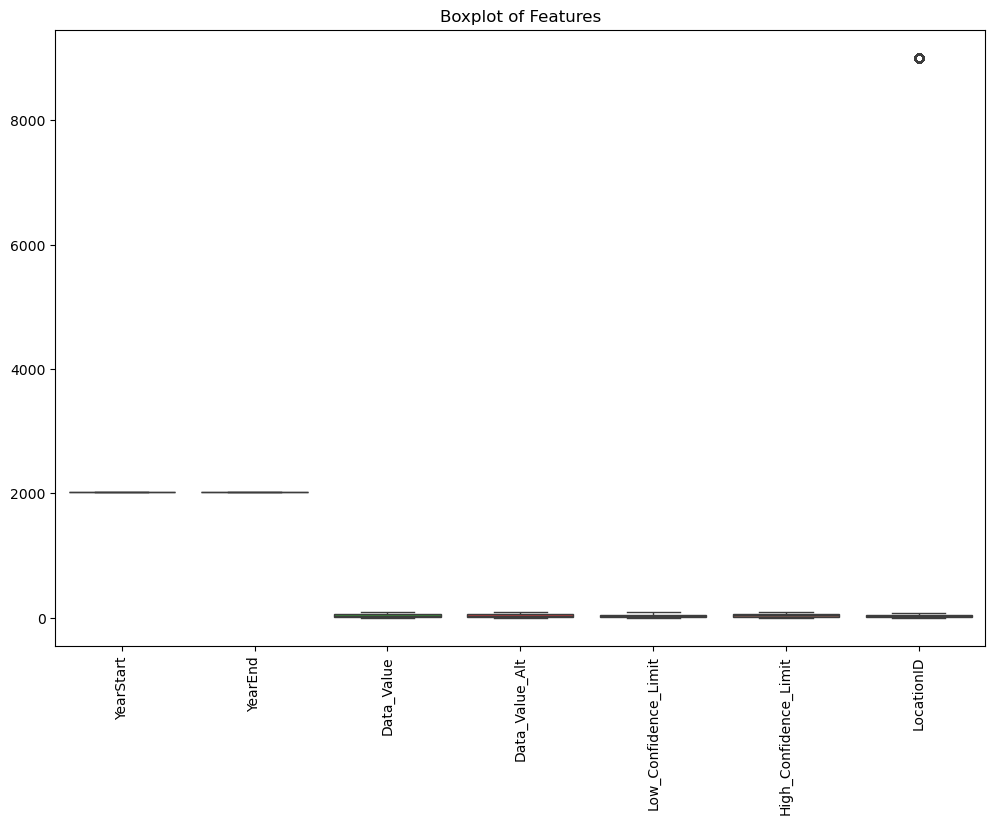

In [35]:
#Check skewness of the data
#Display boxplot of each column
plt.figure(figsize=(12,8))
sns.boxplot(df1)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

In [37]:
#finding outliers

def remove_outliers(df1,columns):
  data_filtered=df1.copy()

  for column in columns:
     Q1 = df1[column].quantile(0.25)
     Q3 = df1[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered

In [39]:
new_df1=remove_outliers(df1,['YearStart','YearEnd','Data_Value','Data_Value_Alt','Low_Confidence_Limit','High_Confidence_Limit','LocationID'])
new_df1

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE
6,BRFSS~2022~2022~40~Q03~TMC01~AGE~RACE,2022,2022,OK,Oklahoma,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-97.52107021 35.47203136),C05,TMC01,Q03,40,AGE,AGE_OVERALL,RACE,NAA
7,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"White, non-Hispanic",POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,AGE_OVERALL,RACE,WHT
8,BRFSS~2022~2022~04~Q35~TOC03~AGE~RACE,2022,2022,AZ,Arizona,BRFSS,Overall Health,Recent activity limitations in past month,Mean number of days with activity limitations ...,Number,...,"White, non-Hispanic",POINT (-111.7638113 34.86597028),C01,TOC03,Q35,4,AGE,65PLUS,RACE,WHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284131,BRFSS~2015~2015~55~Q41~TCC03~AGE~GENDER,2015,2015,WI,Wisconsin,BRFSS,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,%,...,Female,POINT (-89.81637074 44.39319117),C06,TCC03,Q41,55,AGE,5064,GENDER,FEMALE
284132,BRFSS~2020~2020~59~Q40~TGC05~AGE~RACE,2020,2020,US,"United States, DC & Territories",BRFSS,Caregiving,Provide care for someone with cognitive impair...,Percentage of older adults who provided care f...,%,...,Hispanic,NaN,C07,TGC05,Q40,59,AGE,65PLUS,RACE,HIS
284134,BRFSS~2016~2016~54~Q13~TNC04~AGE~GENDER,2016,2016,WV,West Virginia,BRFSS,Nutrition/Physical Activity/Obesity,Obesity,Percentage of older adults who are currently o...,%,...,Female,POINT (-80.71264013 38.6655102),C02,TNC04,Q13,54,AGE,5064,GENDER,FEMALE
284135,BRFSS~2017~2017~54~Q43~TOC11~AGE~OVERALL,2017,2017,WV,West Virginia,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,POINT (-80.71264013 38.6655102),C01,TOC11,Q43,54,AGE,AGE_OVERALL,OVERALL,OVERALL


**After removing outliers using IQR there are only 168859 rows and 31 columns in the new_data.**

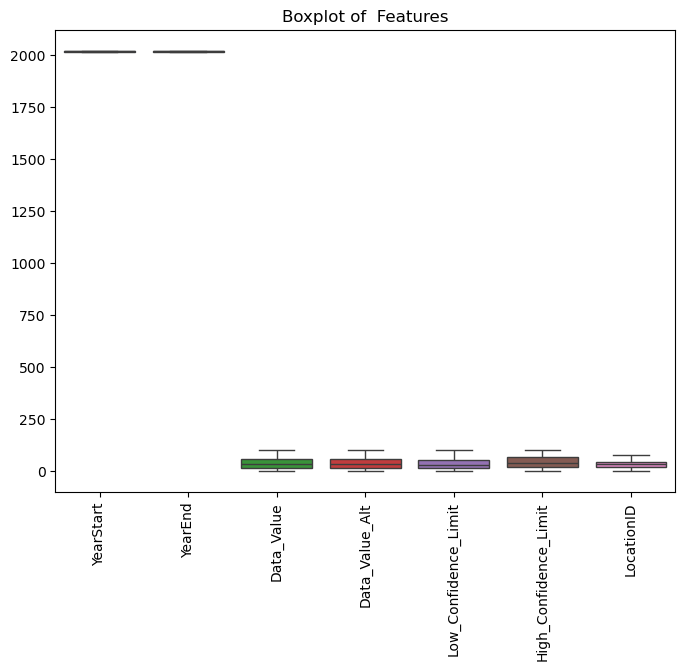

In [41]:
# Visualization of outliers after removing outliers of different features using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(new_df1)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

**Considerable decrease in Outliers after using IQR Method**

In [43]:
# Differentiating Columns
categorical_columns = df1.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['RowId', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'StratificationID1', 'StratificationCategoryID2', 'StratificationID2']
Numerical Columns: ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'LocationID']


In [241]:
#Perform statistical analysis

stats = df1.describe(include='all')  # include='all' gives stats for numerical and categorical data
print(stats)

                                        RowId      YearStart        YearEnd  \
count                                  284142  284142.000000  284142.000000   
unique                                  36046            NaN            NaN   
top     BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE            NaN            NaN   
freq                                       15            NaN            NaN   
mean                                      NaN    2018.596065    2018.657735   
std                                       NaN       2.302815       2.360105   
min                                       NaN    2015.000000    2015.000000   
25%                                       NaN    2017.000000    2017.000000   
50%                                       NaN    2019.000000    2019.000000   
75%                                       NaN    2021.000000    2021.000000   
max                                       NaN    2022.000000    2022.000000   

       LocationAbbr                     LocationDes

In [47]:
#  Renaming the columns 
df1.rename(columns={
    'Stratification1': 'Age',          
    'StratificationID1': 'AgeGroup'
}, inplace=True)

df1.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [295]:
#  Renaming the columns 
df1.rename(columns={
    'Topic': 'Overall_Health_Status'          
    }, inplace=True)

df1.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Overall_Health_Status,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [297]:
#list down the unique values in each feature and find its length.

for column in df1.columns:
    unique_values = df1[column].unique()
    unique_length = len(unique_values)
    print(f"{column}: {unique_values}, Length: {unique_length}")


RowId: ['BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE'
 'BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE'
 'BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE' ...
 'BRFSS~2019~2019~56~Q17~TAC01~AGE~OVERALL'
 'BRFSS~2018~2018~56~Q18~TSC08~AGE~OVERALL'
 'BRFSS~2016~2016~56~Q32~TOC07~AGE~OVERALL'], Length: 36046
YearStart: [2022 2021 2017 2015 2019 2018 2016 2020], Length: 8
YearEnd: [2022 2021 2017 2015 2019 2018 2016 2020], Length: 8
LocationAbbr: ['PA' 'SD' 'ID' 'MD' 'WI' 'IA' 'OK' 'AZ' 'OH' 'SOU' 'NV' 'GA' 'NRE' 'CO'
 'OR' 'AR' 'NY' 'US' 'PR' 'GU' 'KS' 'WA' 'VT' 'HI' 'DC' 'AK' 'NH' 'MT'
 'NM' 'AL' 'LA' 'KY' 'UT' 'NJ' 'TN' 'ME' 'TX' 'WV' 'MS' 'RI' 'VA' 'NE'
 'CA' 'IL' 'CT' 'ND' 'MA' 'FL' 'SC' 'NC' 'WY' 'WEST' 'MDW' 'MI' 'VI' 'MO'
 'DE' 'MN' 'IN'], Length: 59
LocationDesc: ['Pennsylvania' 'South Dakota' 'Idaho' 'Maryland' 'Wisconsin' 'Iowa'
 'Oklahoma' 'Arizona' 'Ohio' 'South' 'Nevada' 'Georgia' 'Northeast'
 'Colorado' 'Oregon' 'Arkansas' 'New York'
 'United States, DC & Territories' 'Puerto Rico' 'Guam' 'Kansas'
 

** The following details are got from the above iteration:The period of the collection of data is 8 years i.e 2015-2022.
The data is collected from 59 locations.Datasource is BRFSS.There are 7 classes.There are 39 types in overall health status
 and 39 questions were asnwered.**


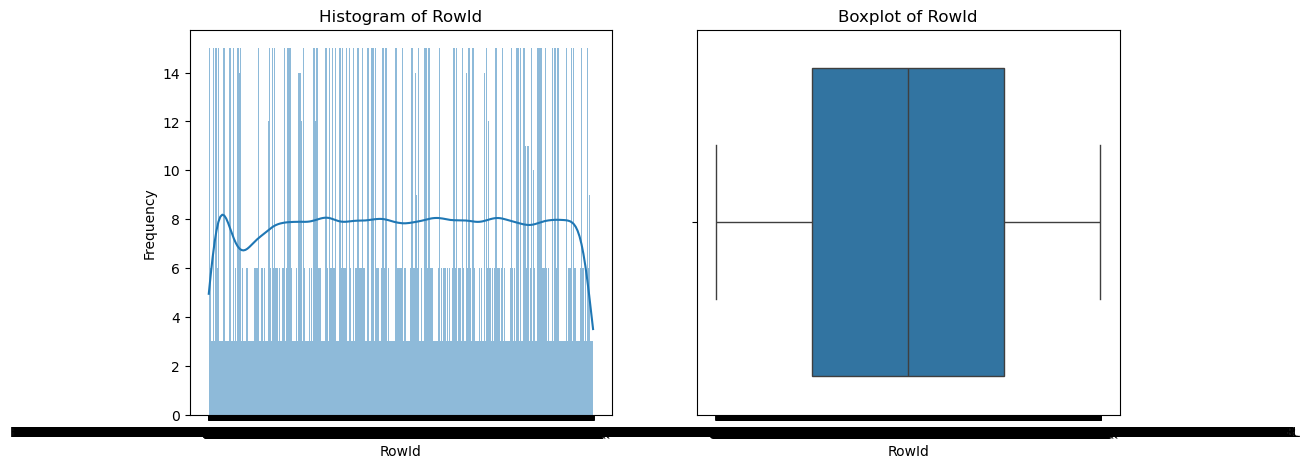

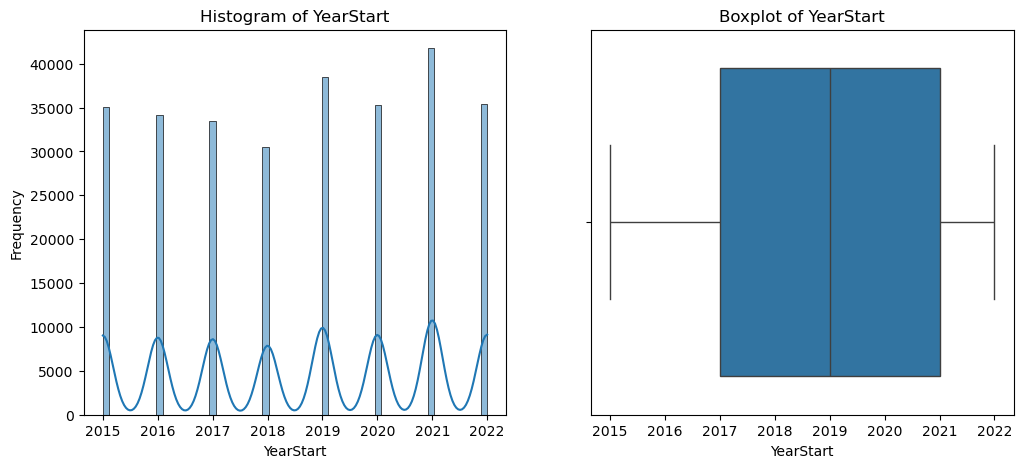

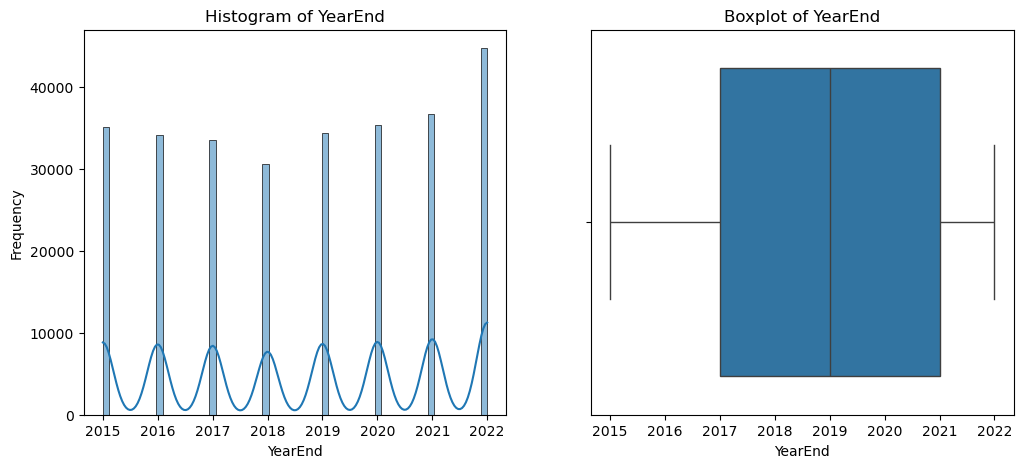

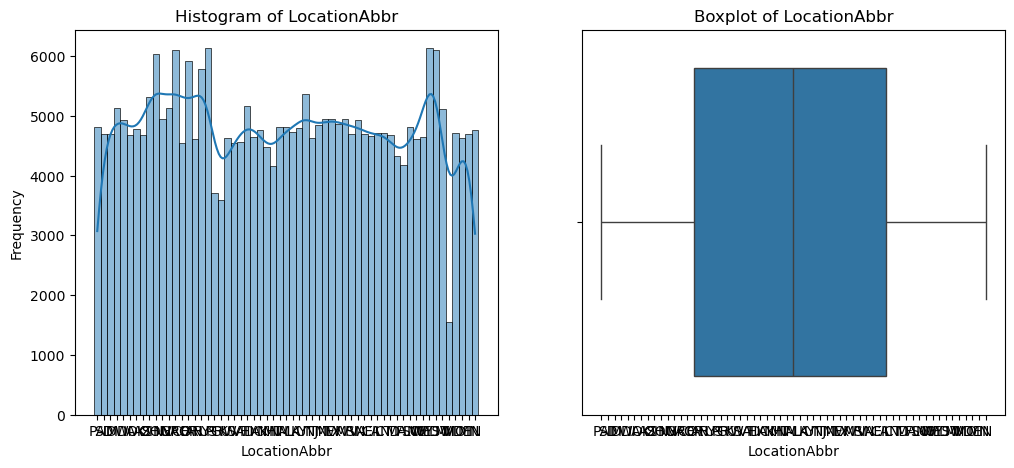

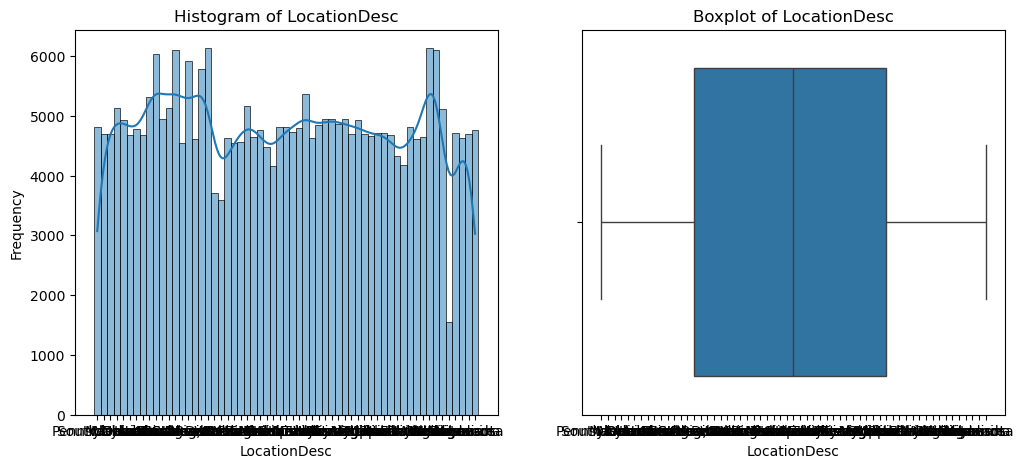

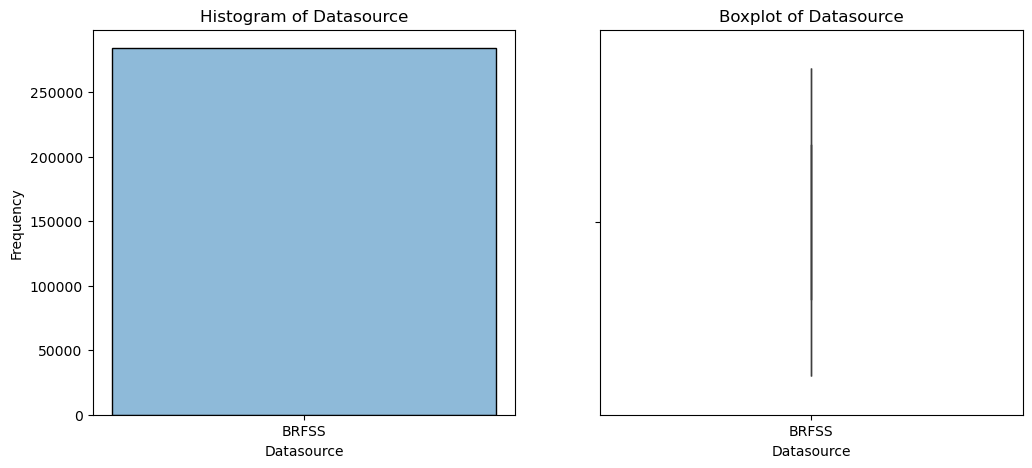

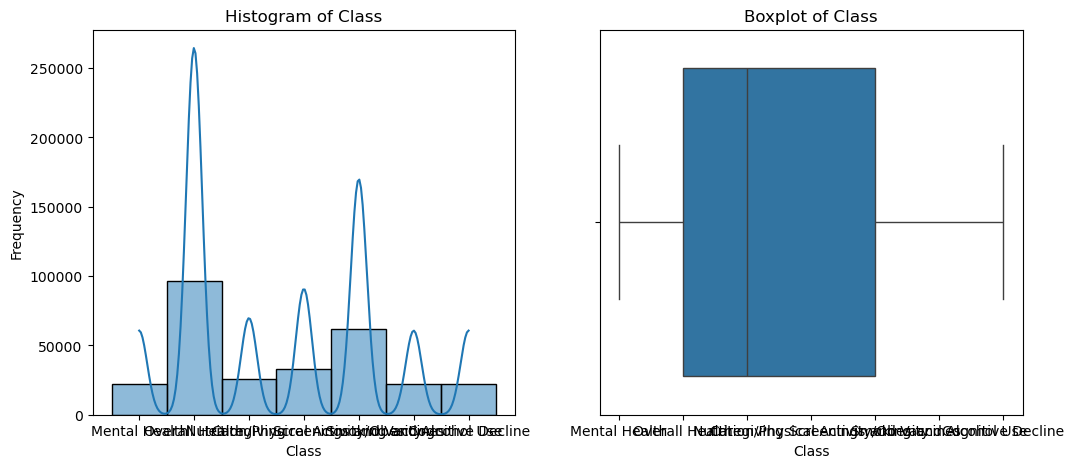

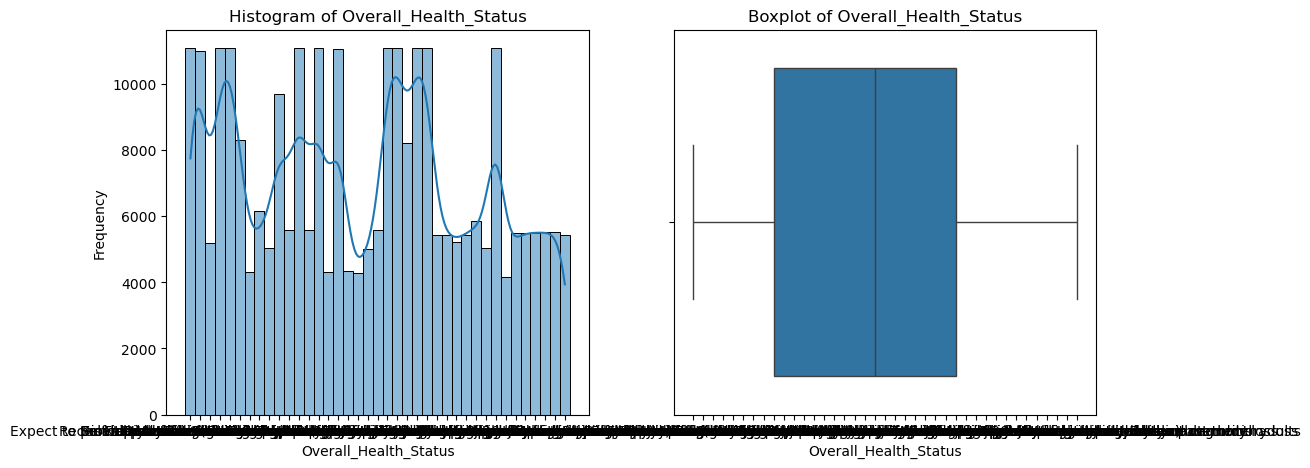

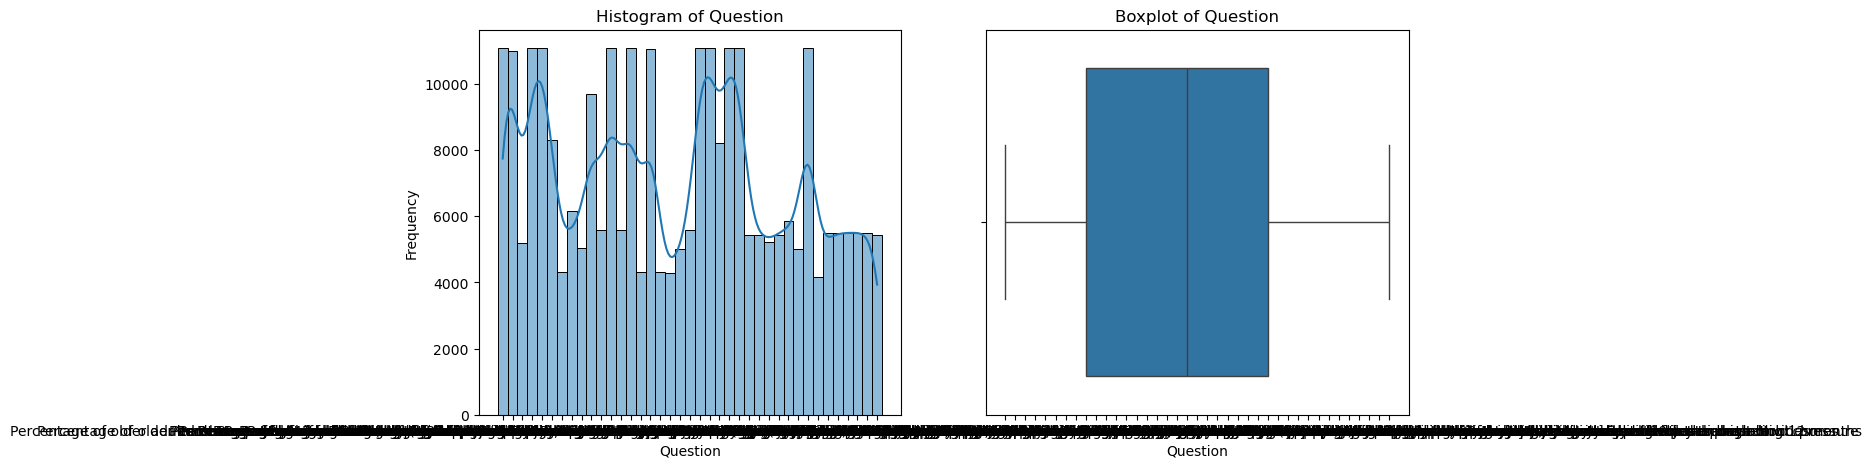

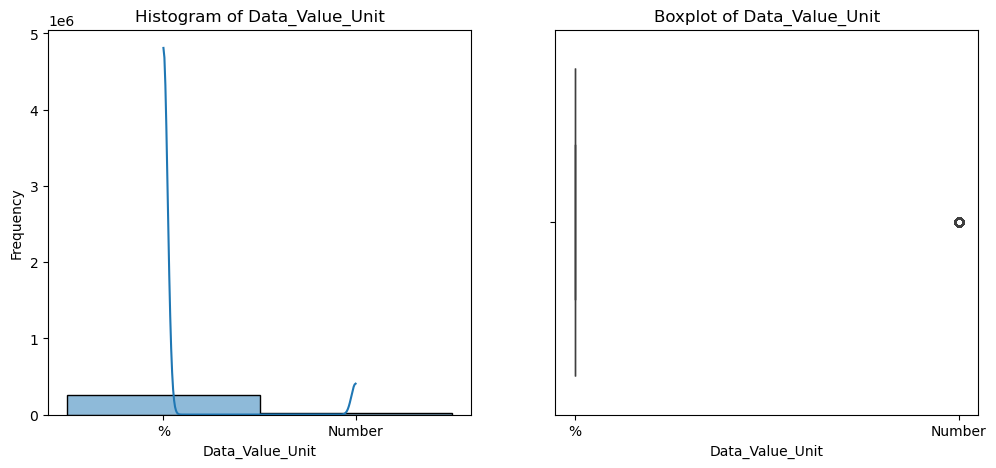

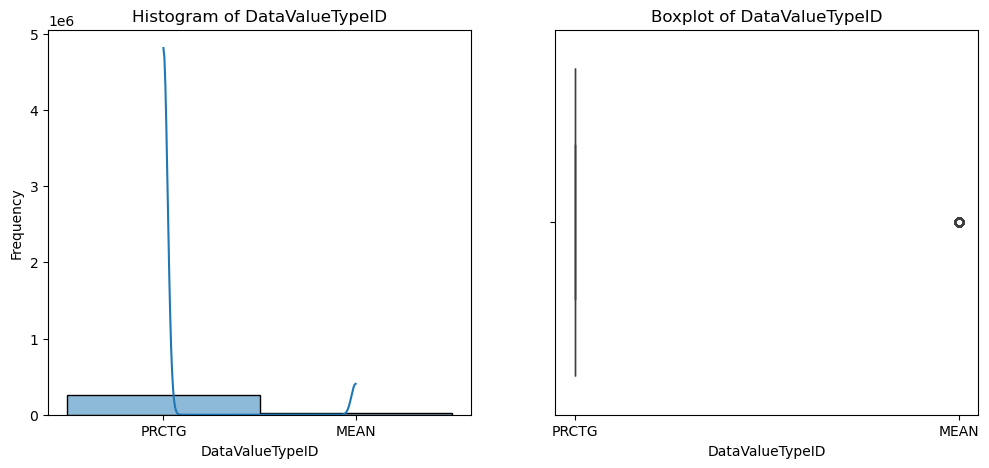

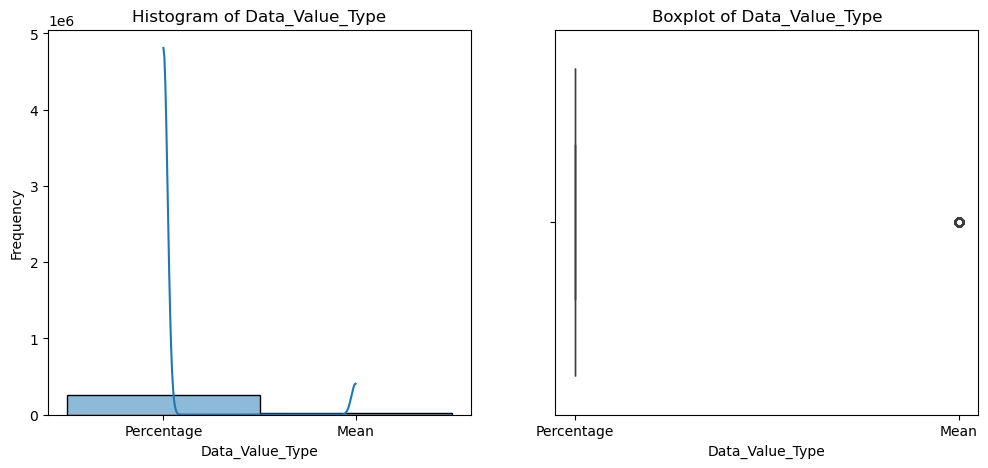

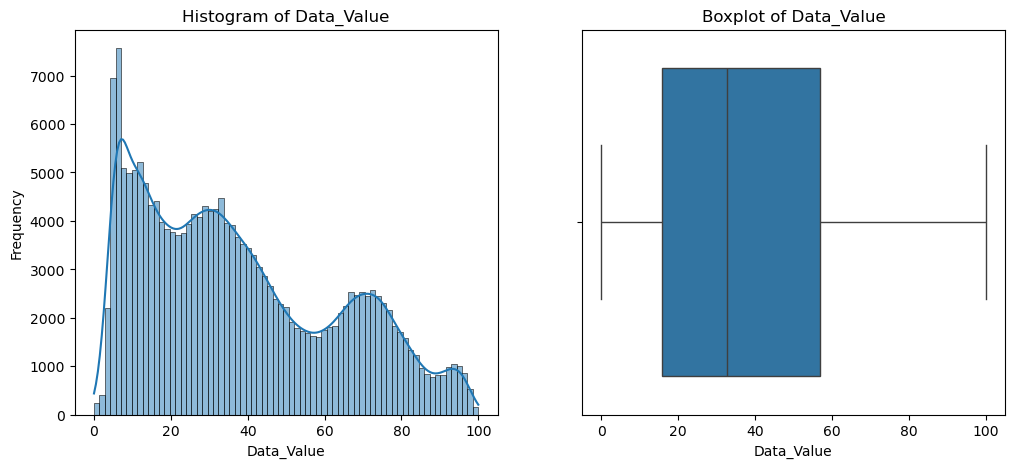

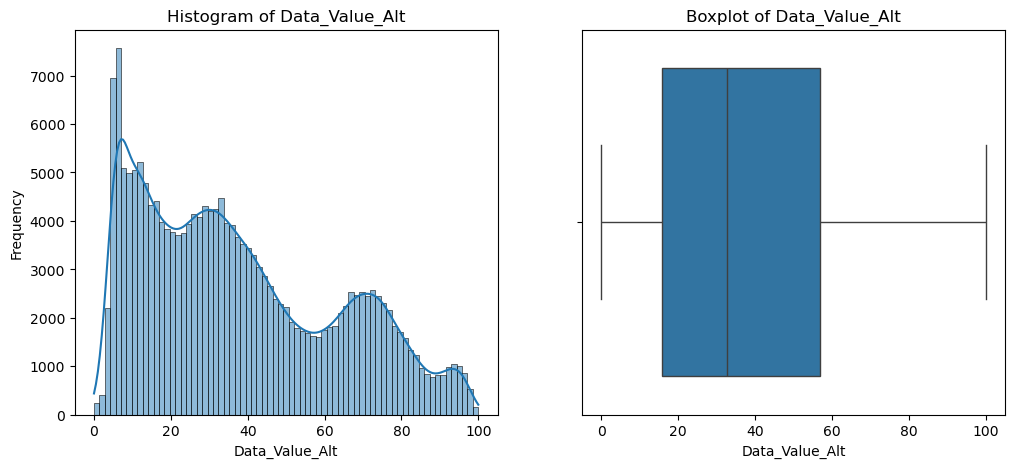

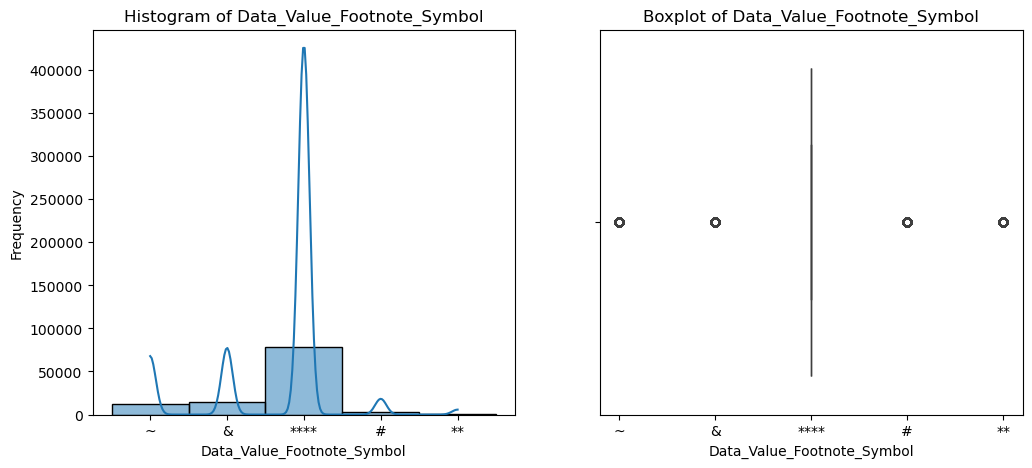

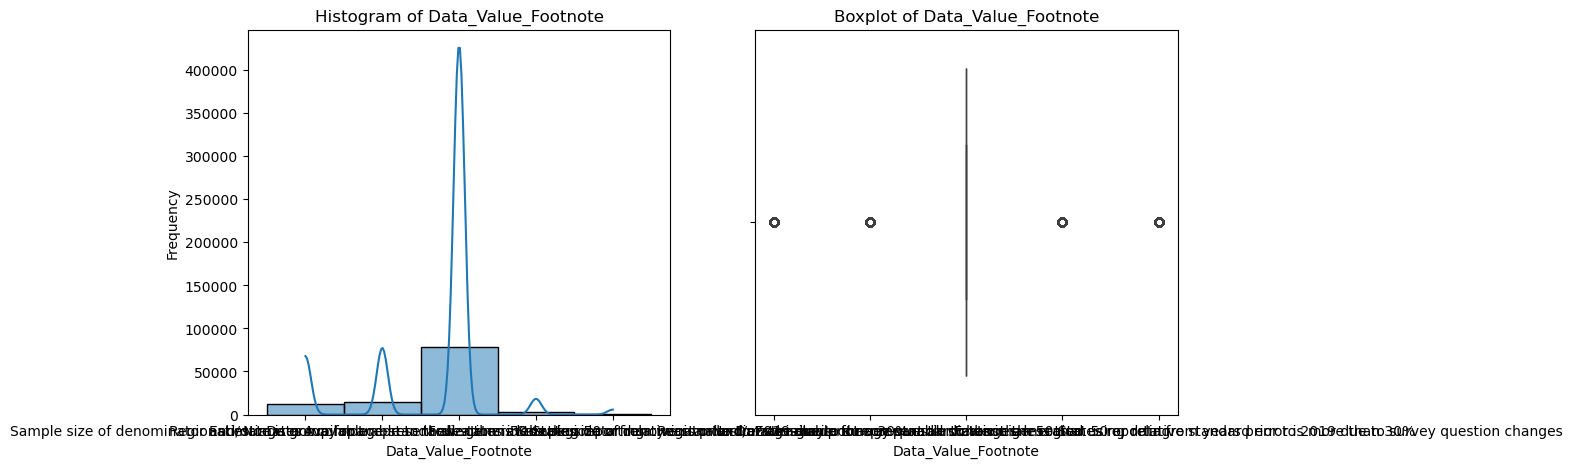

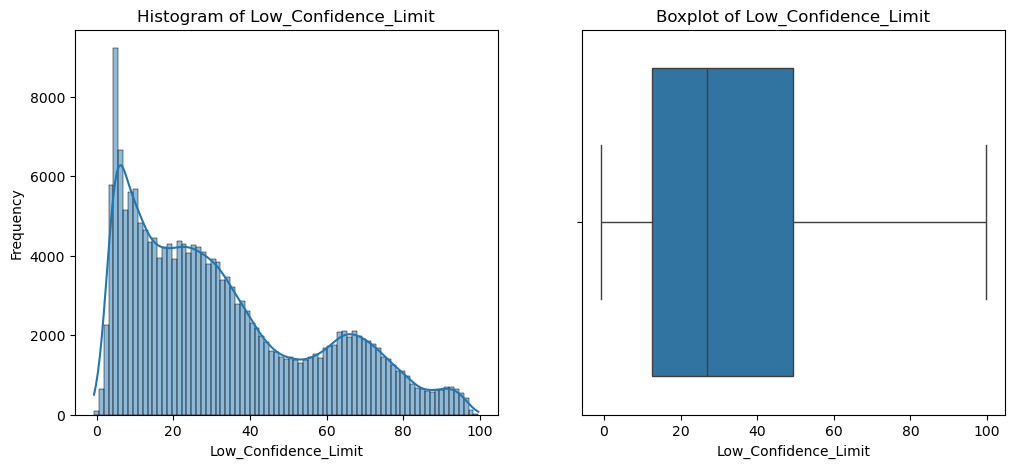

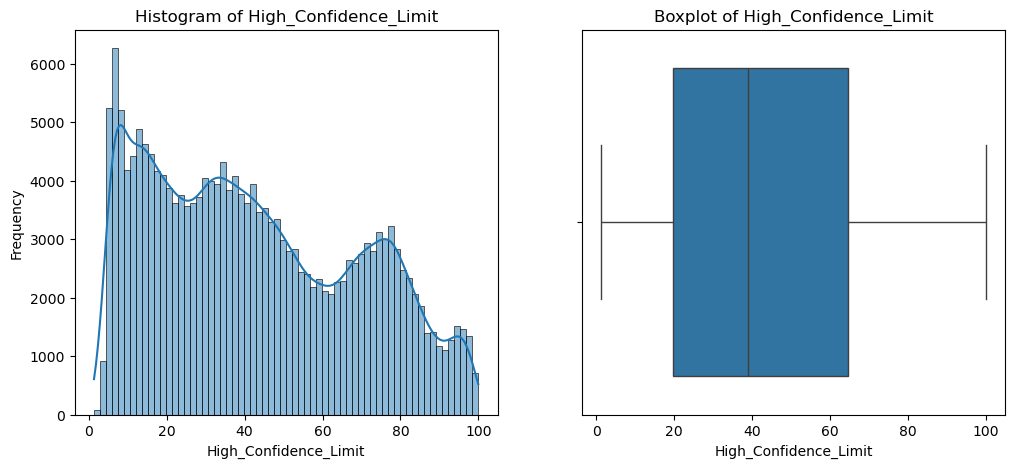

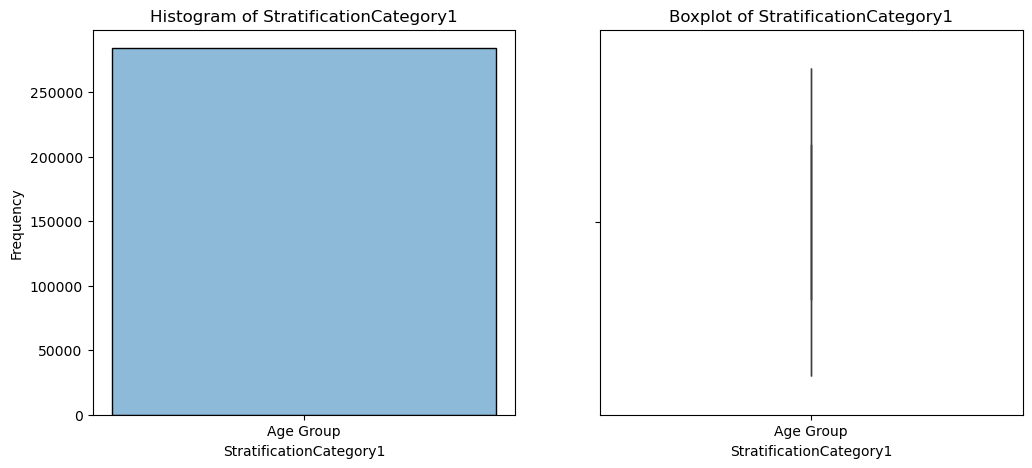

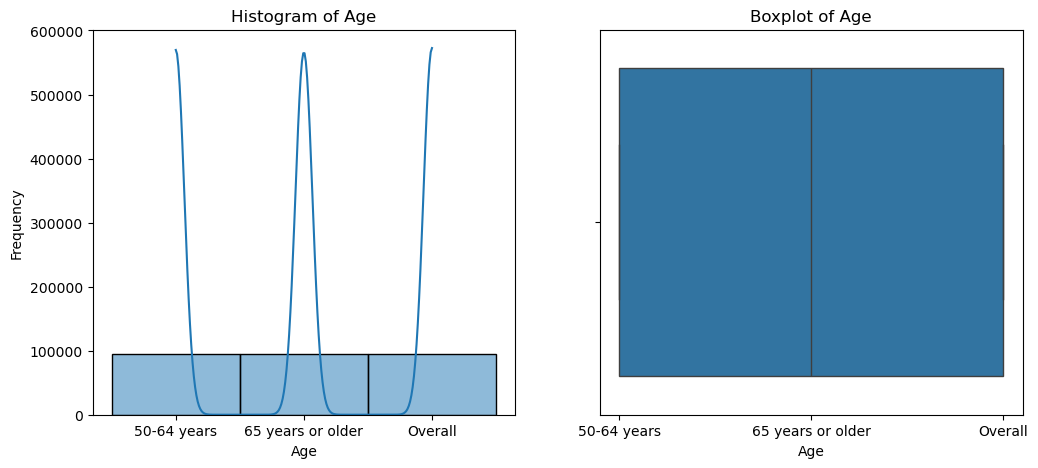

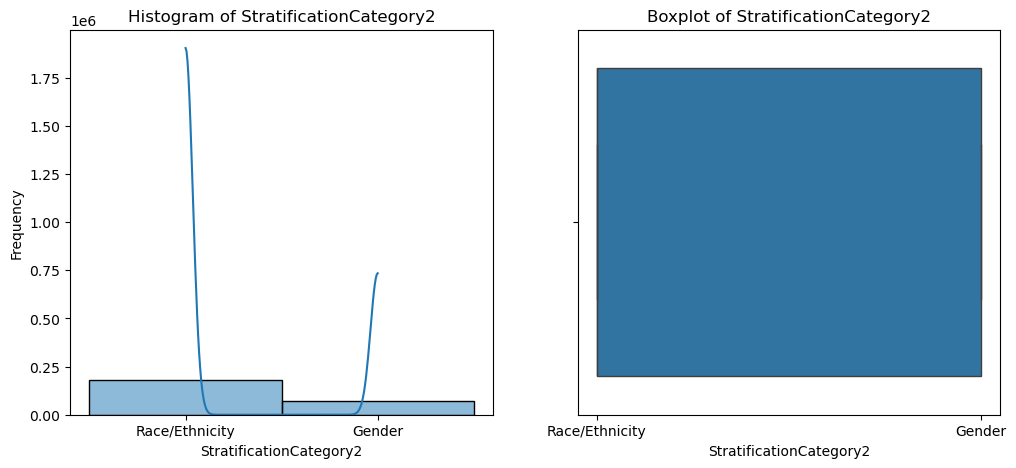

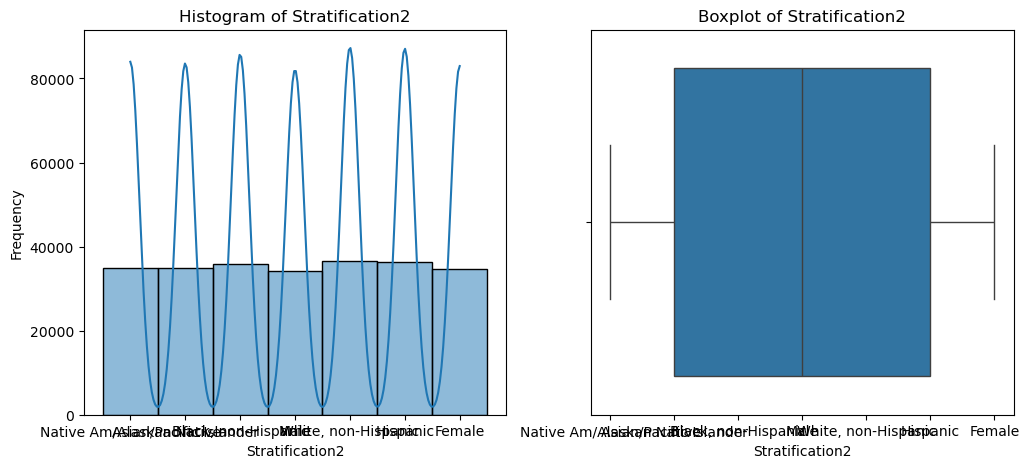

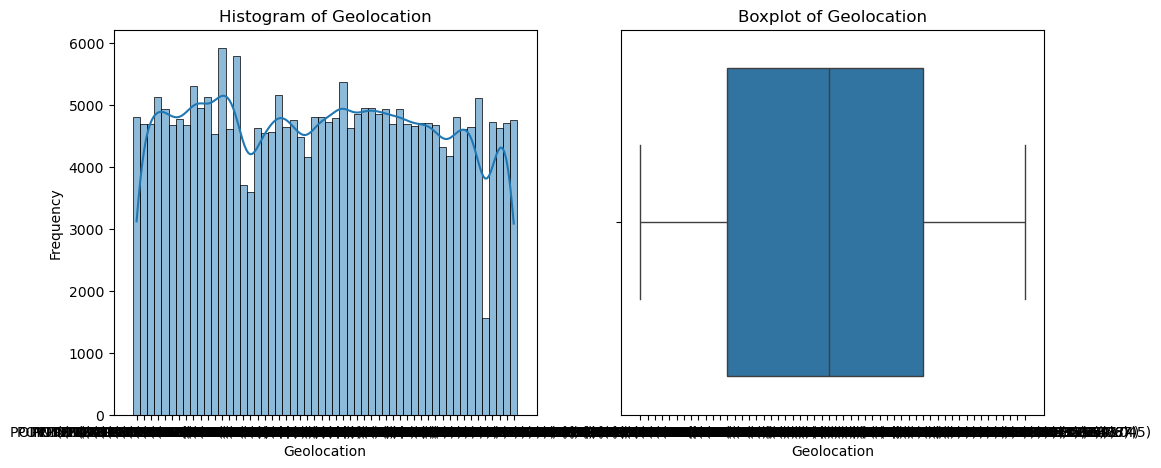

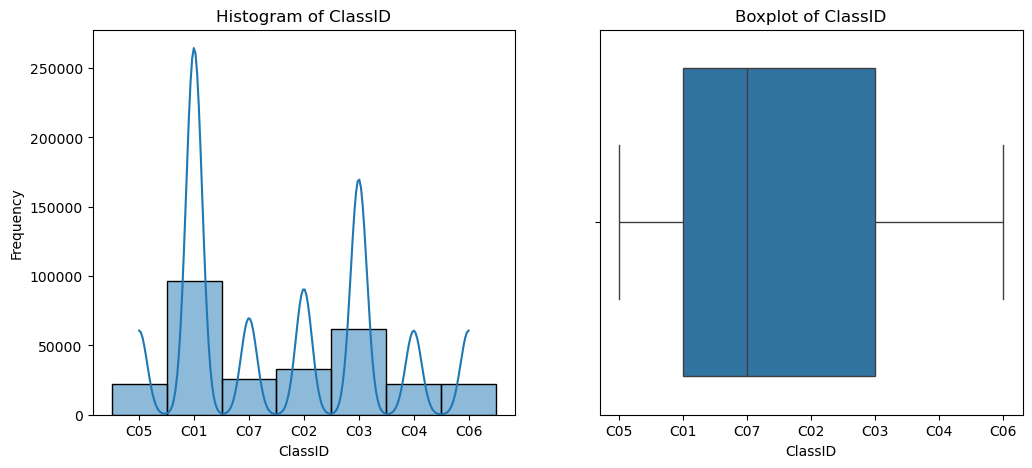

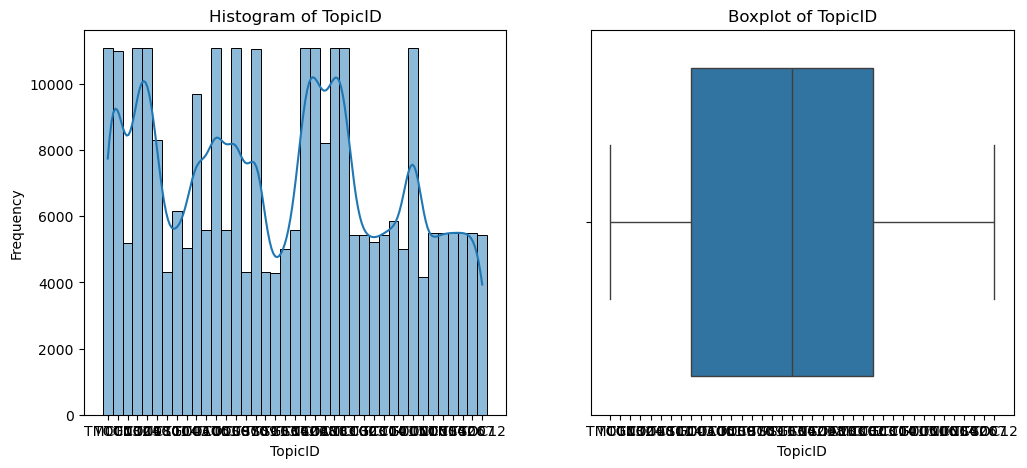

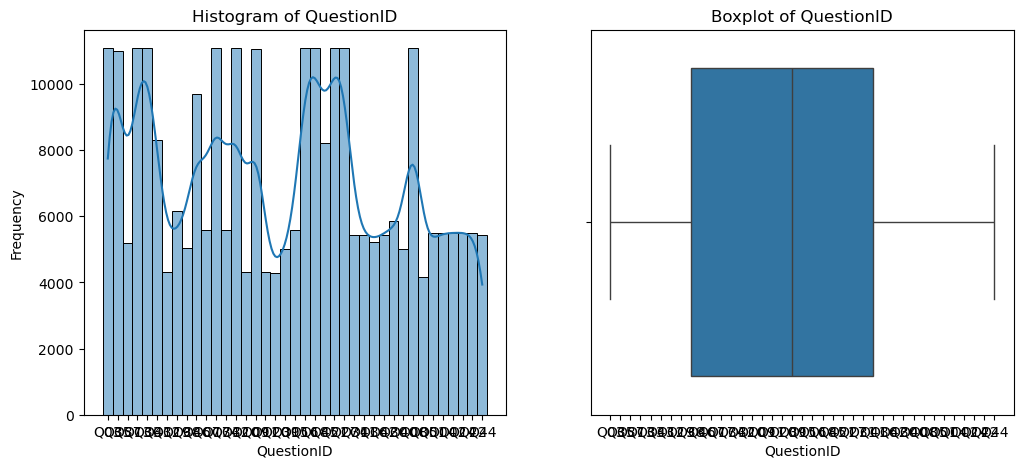

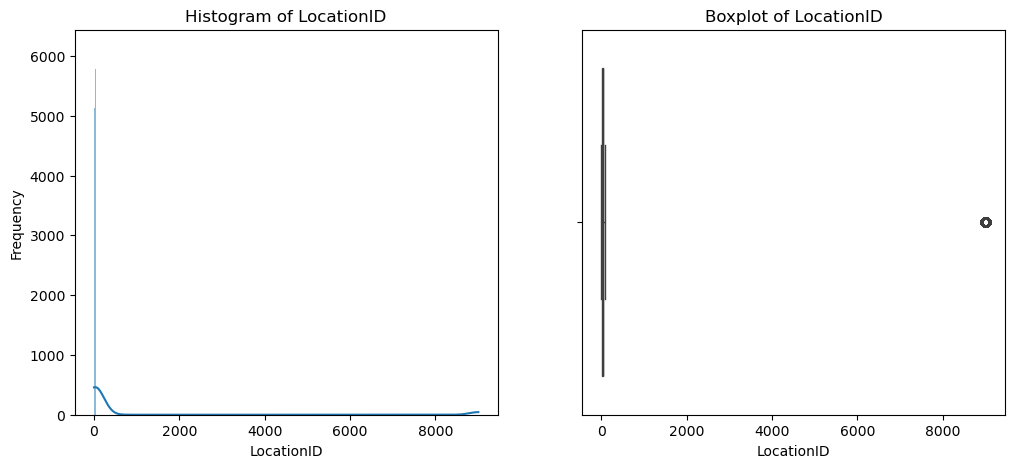

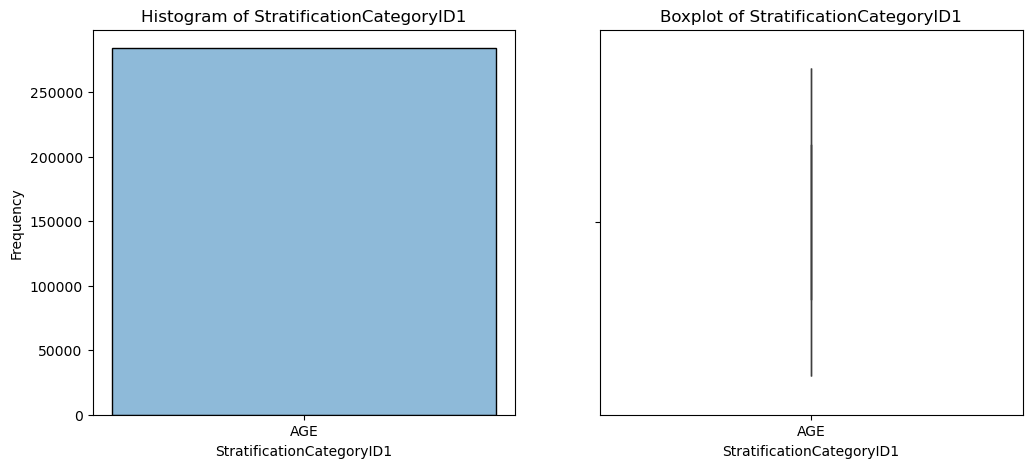

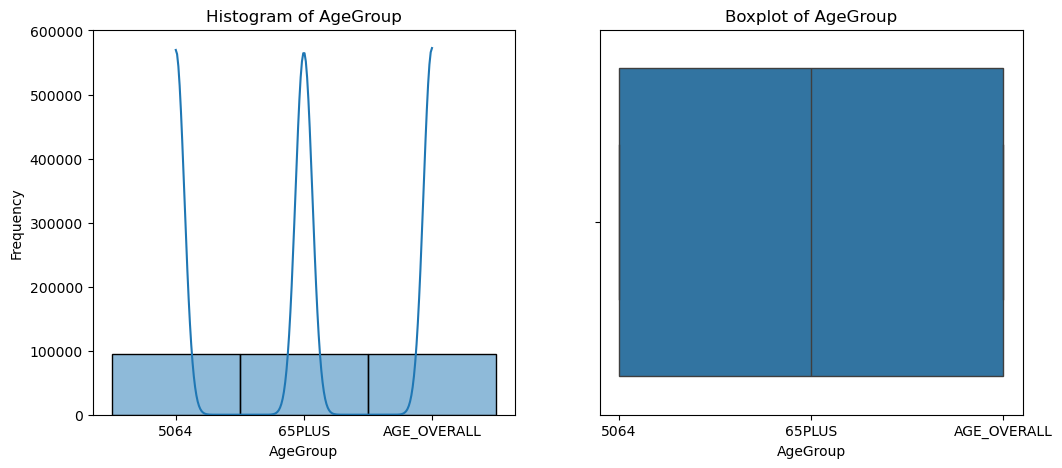

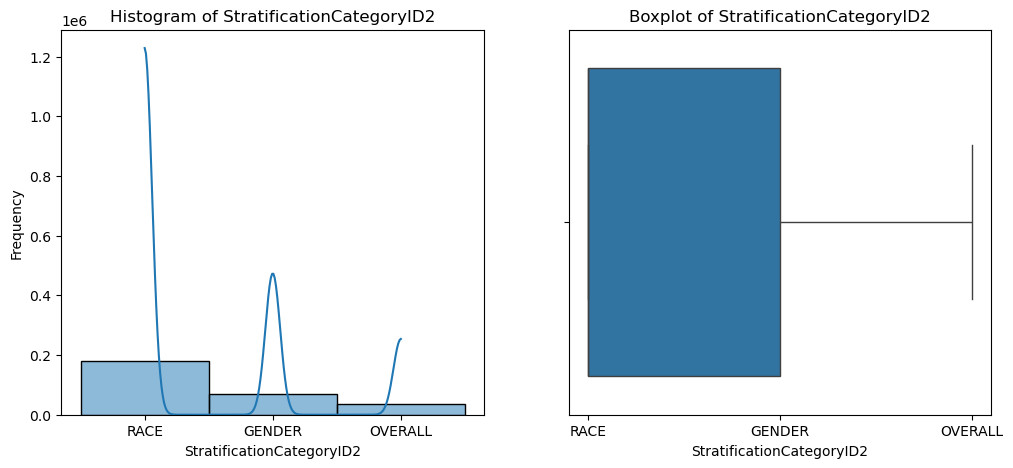

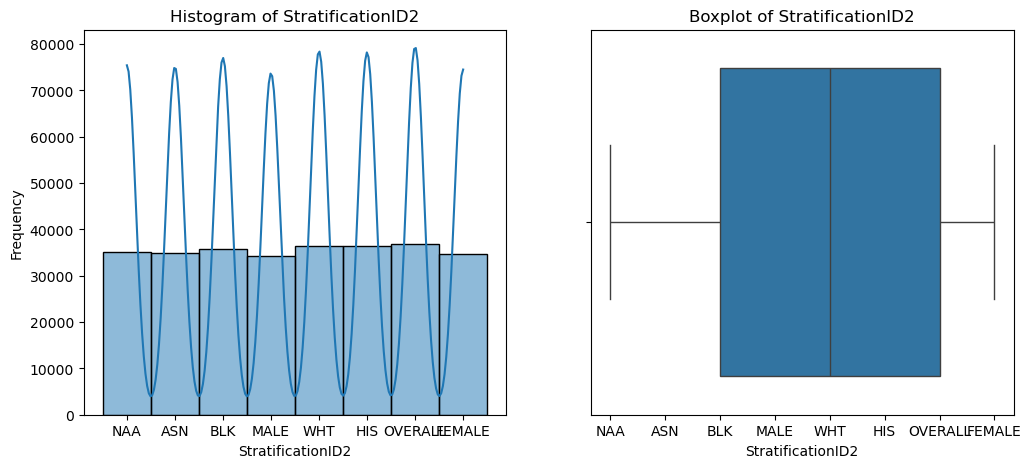

In [53]:
for i in df1.columns:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[i])
    plt.title(f'Boxplot of {i}')

    plt.show()

**Data Story:Most of the features are left skewed**

In [57]:
df1["Overall_Health_Status"].value_counts()

Overall_Health_Status
Frequent mental distress                                                                                  11092
Current smoking                                                                                           11092
Influenza vaccine within past year                                                                        11092
Lifetime diagnosis of depression                                                                          11092
Obesity                                                                                                   11092
Physically unhealthy days (mean number of days)                                                           11092
No leisure-time physical activity within past month                                                       11092
Self-rated health (good to excellent health)                                                              11091
Binge drinking within past 30 days                                                

In [61]:
Overall_Health_Status =39
total_patients =284142
patients = pd.Series(df1["Overall_Health_Status"].value_counts())
percentage =(patients/total_patients)*100
result = pd.concat([patients,percentage.round(2)],axis=1,keys = ["no of patients","percentage"])
result

,no of patients,percentage
Overall_Health_Status,,
Frequent mental distress,11092,3.90
Current smoking,11092,3.90
Influenza vaccine within past year,11092,3.90
Lifetime diagnosis of depression,11092,3.90
Obesity,11092,3.90
Physically unhealthy days (mean number of days),11092,3.90
No leisure-time physical activity within past month,11092,3.90
Self-rated health (good to excellent health),11091,3.90
Binge drinking within past 30 days,11091,3.90


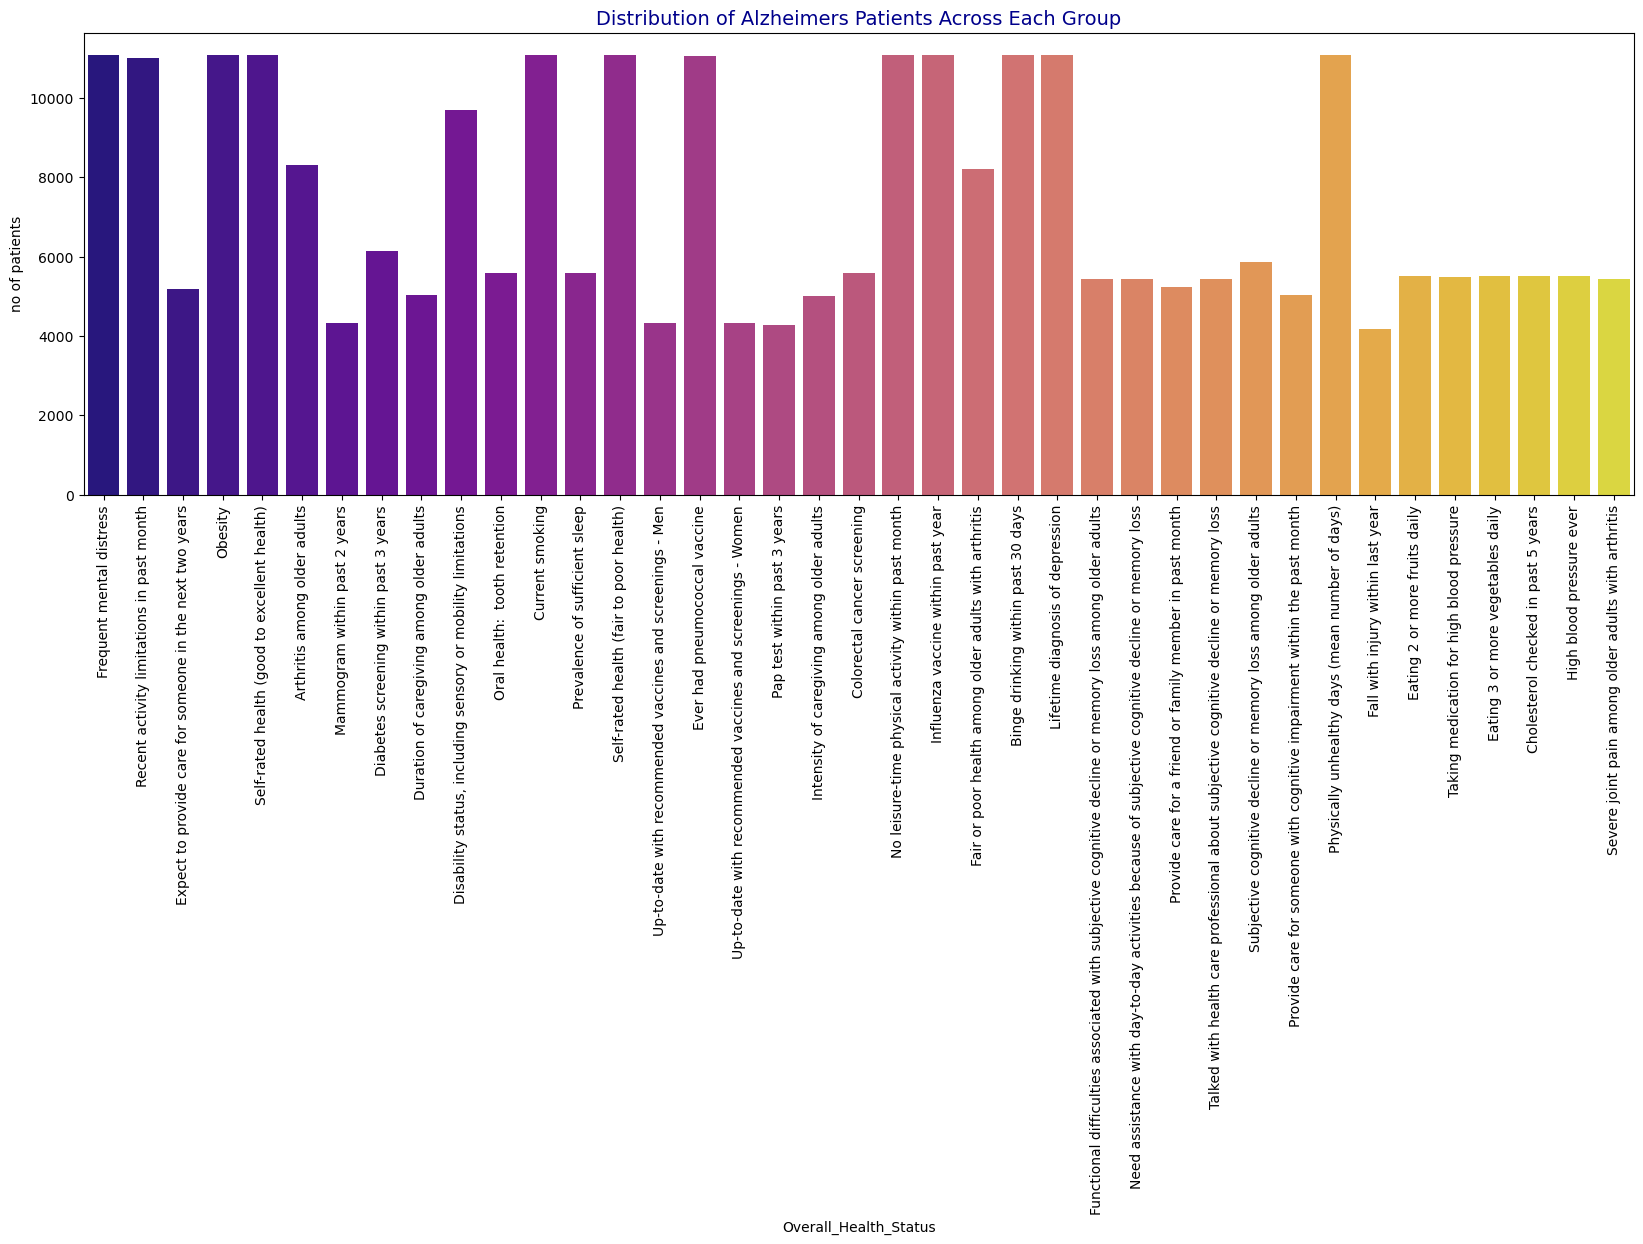

In [71]:
# Create the plot
import seaborn as sns

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
plt.xlabel('Overall_Health_Status')
plt.ylabel('no of patients')
sns.countplot(x ='Overall_Health_Status',data = df1,hue = 'Overall_Health_Status',palette = 'plasma')
plt.title('Distribution of Alzheimers Patients Across Each Group',fontsize=14,color="darkblue")
plt.show()

**Data Story:The countplot analysis based on the Overall Health Status of the Alzheimer's patients,reveals that out of the 39 groups 7 groups have the highest count("Frequent mental distress,
Current smokin,
Influenza vaccine within past ye, 0
Lifetime diagnosis of depress,90
Obe,s.90
Physically unhealthy days (mean number of and 3.90
No leisure-time physical activity within pastm)"ighest numbpatientsloyees t 11092 with the percentage 3.90h is 19 and closely follow3 groups i.e eSelf-rated health (good to excellent health),
Binge drinking within past 30 day,
Self-rated health (fair to poor heal)thzil11091s"The remaining 29 groups have varying counts from 11051 to 4173.**ployees.

In [77]:
#grouping Alzheimers Patients  by Location
grp_location = df1.groupby("LocationDesc")
for location, group in grp_location:
    print(f"location:{location}")
    print(group[["Overall_Health_Status","LocationDesc"]])
    print("\n")

location:Alabama
                                  Overall_Health_Status LocationDesc
56                         Pap test within past 3 years      Alabama
57                         Pap test within past 3 years      Alabama
233                    Lifetime diagnosis of depression      Alabama
254                  Binge drinking within past 30 days      Alabama
598        Self-rated health (good to excellent health)      Alabama
...                                                 ...          ...
281366  Physically unhealthy days (mean number of days)      Alabama
282111  Physically unhealthy days (mean number of days)      Alabama
282884  Physically unhealthy days (mean number of days)      Alabama
283612  Physically unhealthy days (mean number of days)      Alabama
283752  Physically unhealthy days (mean number of days)      Alabama

[4807 rows x 2 columns]


location:Alaska
                                    Overall_Health_Status LocationDesc
43      Up-to-date with recommended vacci

unique positions : ['Pennsylvania' 'South Dakota' 'Idaho' 'Maryland' 'Wisconsin' 'Iowa'
 'Oklahoma' 'Arizona' 'Ohio' 'South' 'Nevada' 'Georgia' 'Northeast'
 'Colorado' 'Oregon' 'Arkansas' 'New York'
 'United States, DC & Territories' 'Puerto Rico' 'Guam' 'Kansas'
 'Washington' 'Vermont' 'Hawaii' 'District of Columbia' 'Alaska'
 'New Hampshire' 'Montana' 'New Mexico' 'Alabama' 'Louisiana' 'Kentucky'
 'Utah' 'New Jersey' 'Tennessee' 'Maine' 'Texas' 'West Virginia'
 'Mississippi' 'Rhode Island' 'Virginia' 'Nebraska' 'California'
 'Illinois' 'Connecticut' 'North Dakota' 'Massachusetts' 'Florida'
 'South Carolina' 'North Carolina' 'Wyoming' 'West' 'Midwest' 'Michigan'
 'Virgin Islands' 'Missouri' 'Delaware' 'Minnesota' 'Indiana']


<Axes: title={'center': 'Alzheimers Patient Count By Location'}, xlabel='LocationDesc', ylabel='count'>

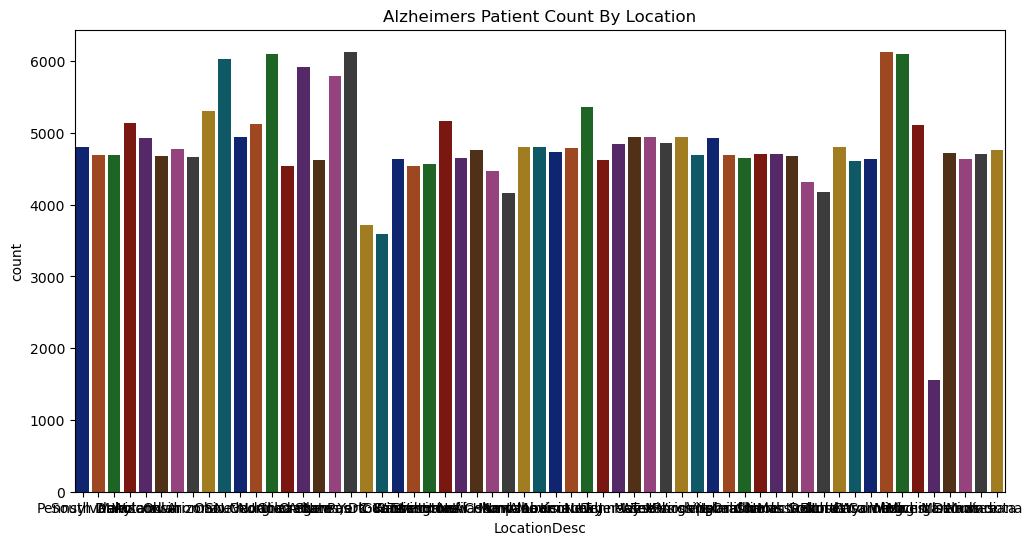

In [83]:
location = df1["LocationDesc"].unique()
print("unique positions :",location)
plt.figure(figsize=(12,6))
plt.title("Alzheimers Patient Count By Location")
sns.countplot(x = "LocationDesc",data = df1,hue="LocationDesc",palette = "dark")

**DATA STORY: According to countplot analysis: In United States,DC& Territoies has got the highest number of patients(6132)
followed by West,Northeast,etc.The lowest number of patients are in Virgin Islands(1556)**

### 6.Encoding Categorical Data
Converting categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [291]:
#Creating a copy of data
data1=df1.copy()
data1.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Overall_Health_Status,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [293]:
#Checking the columns after renaming
# Differentiating Columns
categorical_columns = data1.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data1.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print Results
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: ['RowId', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Overall_Health_Status', 'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategory1', 'Age', 'StratificationCategory2', 'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'AgeGroup', 'StratificationCategoryID2', 'StratificationID2']
Numerical Columns: ['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'LocationID']


In [375]:
# 1. Label Encoding for ordinal categorical variables
# This is appropriate for ordinal data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data1['LocationDesc'] = label_encoder.fit_transform(data1['LocationDesc'])  
print("\nDataFrame after Label Encoding LocationDesc:")
print(data1['LocationDesc'].head())


DataFrame after Label Encoding LocationDesc:
0    41
1    46
2    13
3    21
4    57
Name: LocationDesc, dtype: int32


In [377]:
label_encoder = LabelEncoder()
data1['LocationAbbr'] = label_encoder.fit_transform(data1['LocationAbbr'])  
print("\nDataFrame after Label Encoding LocationAbbr:")
print(data1['LocationAbbr'].head())


DataFrame after Label Encoding LocationAbbr:
0    41
1    45
2    14
3    21
4    56
Name: LocationAbbr, dtype: int32


In [379]:
label_encoder = LabelEncoder()
data1['Class'] = label_encoder.fit_transform(data1['Class'])  
print("\nDataFrame after Label Encoding Class:")
print(data1['Class'].head())


DataFrame after Label Encoding Class:
0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int32


In [381]:
categorical_cols = ['RowId', 
    'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Overall_Health_Status',
    'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 
    'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategory1','Age', 
    'Data_Value_Unit', 'StratificationCategory2', 'Stratification2', 'Geolocation', 
    'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'AgeGroup', 
    'StratificationCategoryID2', 'StratificationID2'
]

# Perform label encoding in one step
for col in categorical_cols:
    data1[col] = data1[col].astype('str')
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])

print("Label Encoded DataFrame:")
print(data1.head())


Label Encoded DataFrame:
   RowId  YearStart  YearEnd  LocationAbbr  LocationDesc  Datasource  Class  \
0  27035       2022     2022            36            36           0      2   
1  27305       2022     2022            40            41           0      2   
2  24875       2022     2022             6             5           0      2   
3  25548       2022     2022            14            14           0      2   
4  27983       2022     2022            52            53           0      2   

   Overall_Health_Status  Question  Data_Value_Unit  ...  Stratification2  \
0                      6        14                0  ...                6   
1                      6        14                0  ...                1   
2                      6        14                0  ...                2   
3                      6        14                0  ...                2   
4                      6        14                0  ...                5   

   Geolocation  ClassID  TopicID  Que

In [335]:
label_encoder = LabelEncoder()
data1['Overall_Health_Status'] = label_encoder.fit_transform(data1['Overall_Health_Status'])  
print("\nDataFrame after Label EncodingOverall_Health_Status:")
print(data1['Overall_Health_Status'].head())


DataFrame after Label EncodingOverall_Health_Status:
0    14
1    14
2    14
3    14
4    14
Name: Overall_Health_Status, dtype: int32


In [383]:
#2. One-Hot Encoding for non-ordinal categorical variables
categorical_cols = [ 
    'LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Overall_Health_Status',
    'Question', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 
    'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategory1',  
    'Data_Value_Unit', 'StratificationCategory2', 'Stratification2', 'Geolocation', 
    'ClassID', 'TopicID', 'QuestionID', 'StratificationCategoryID1', 'AgeGroup', 
    'StratificationCategoryID2', 'StratificationID2'
]

# Apply one-hot encoding
data1_one_hot = pd.get_dummies(data1, columns=categorical_cols)

print("One-Hot Encoded DataFrame:")
print(data1_one_hot.head())

One-Hot Encoded DataFrame:
   RowId  YearStart  YearEnd  Data_Value  Data_Value_Alt  \
0  27035       2022     2022         0.0             0.0   
1  27305       2022     2022         0.0             0.0   
2  24875       2022     2022         0.0             0.0   
3  25548       2022     2022         9.0             9.0   
4  27983       2022     2022         5.6             5.6   

   Low_Confidence_Limit  High_Confidence_Limit  Age  LocationID  \
0                   0.0                    0.0    0          42   
1                   0.0                    0.0    1          46   
2                   0.0                    0.0    1          16   
3                   6.5                   12.3    1          24   
4                   4.4                    7.2    1          55   

   LocationAbbr_0  ...  StratificationCategoryID2_1  \
0           False  ...                        False   
1           False  ...                        False   
2           False  ...                      

In [353]:
label_encoder = LabelEncoder()
data1['RowId'] = label_encoder.fit_transform(data1['RowId'])  
print("\nDataFrame after Label Encoding RowId:")
print(data1['RowId'].head())


DataFrame after Label Encoding RowId:
0    34329
1    34572
2    32385
3    32991
4    35182
Name: RowId, dtype: int32


In [355]:
label_encoder = LabelEncoder()
data1['Datasource'] = label_encoder.fit_transform(data1['Datasource'])  
print("\nDataFrame after Label EncodingDatasource :")
print(data1['Datasource'].head())


DataFrame after Label EncodingDatasource :
0    0
1    0
2    0
3    0
4    0
Name: Datasource, dtype: int32


### 7.Feature Selection

In [337]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif 
import pandas as pd

#Separate categorical and numerical features

categorical_cols = data1.select_dtypes (include=['object', 'bool']).columns

numerical_cols = data1.select_dtypes (include=['int64', 'float64']).columns

X_categorical= data1[categorical_cols]

X_numerical = data1[numerical_cols]

y = data1['Overall_Health_Status']

#ANOVA for numerical features

f_selector = SelectKBest(f_classif, k=10) # K represents number of features.

X_f = f_selector.fit_transform(X_numerical,y)

f_selected_features = X_numerical.columns[f_selector.get_support()]

print("All columns",data1.columns)

print("ANOVA selected features:", f_selected_features)

All columns Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Overall_Health_Status', 'Question',
       'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'StratificationCategory1', 'Age', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'AgeGroup',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')
ANOVA selected features: Index(['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'LocationID'],
      dtype='object')


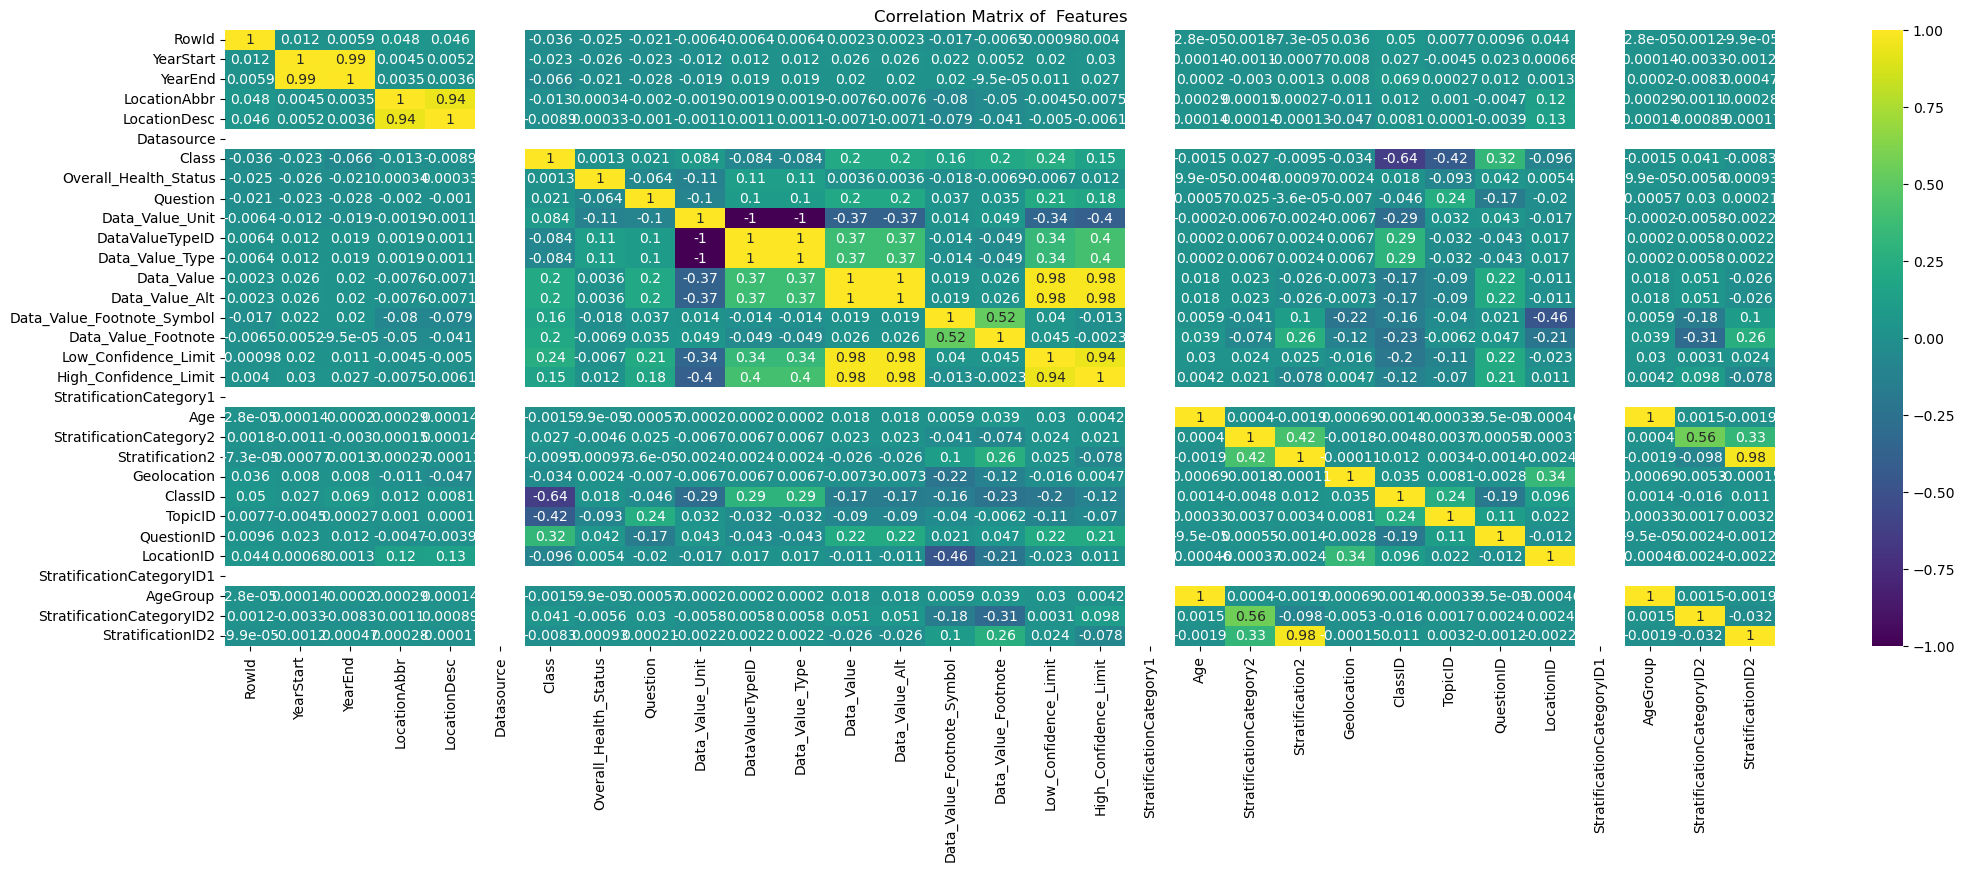

In [151]:
# Correlation Matrix 
# heatmap will help you understand relationships betweenl features
# we can check multi collinearity
plt.figure(figsize=(25,8))
sns.heatmap(data1.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()

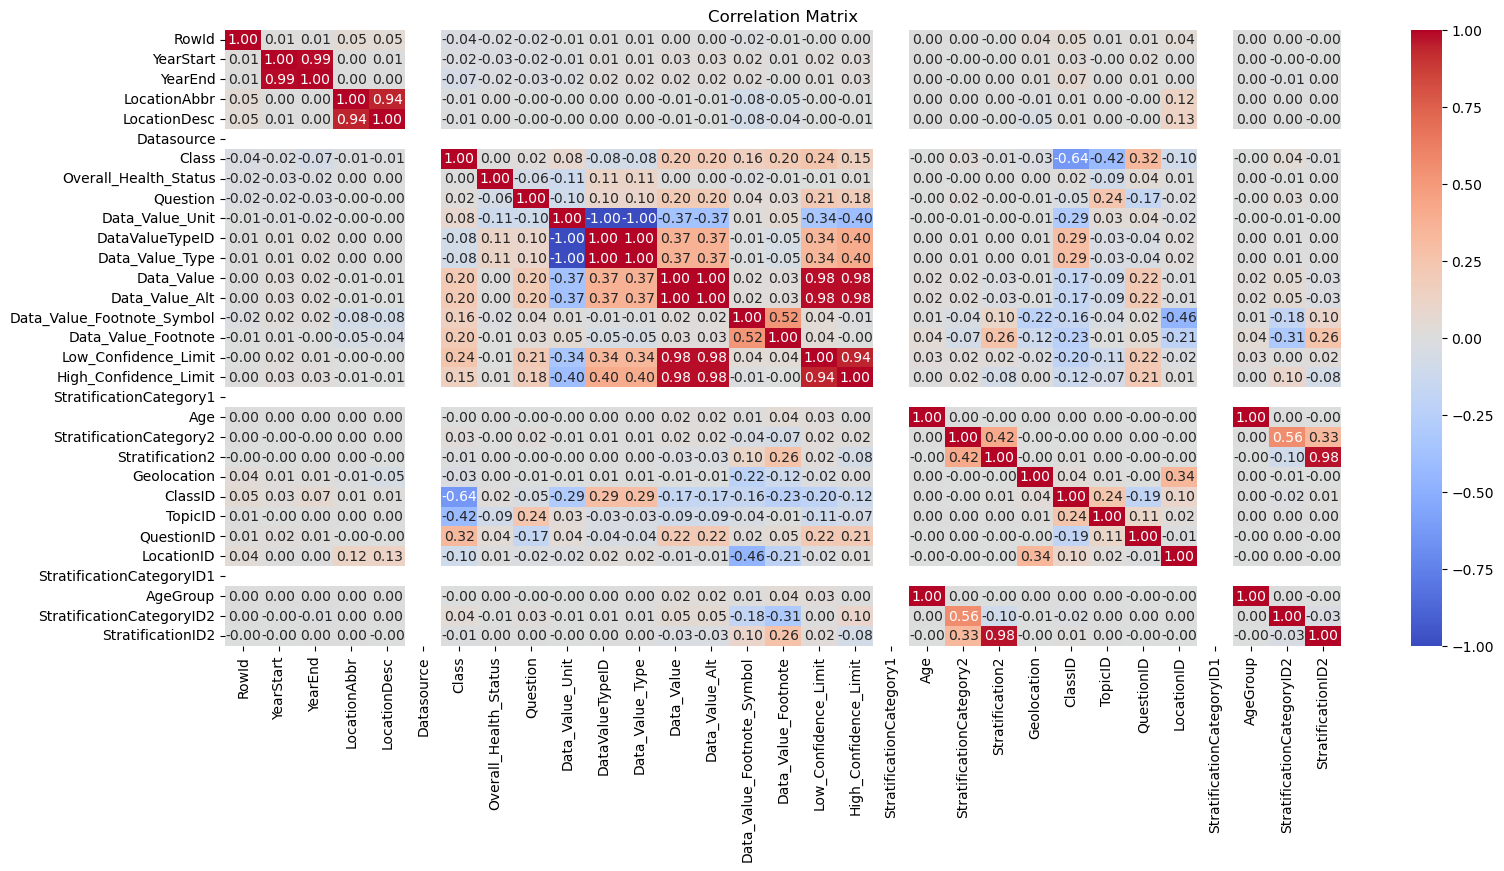

In [155]:
#for more clarity plotting another heat map
# Calculate correlation matrix
corr_matrix = data1.corr()

# Plot correlation heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Data Story:
A value close to +1 indicates a strong positive linear relationship, meaning as one feature increases, the other feature also tends to increase.
A value close to -1 indicates a strong negative linear relationship, meaning as one feature increases, the other feature tends to decrease.
A value around 0 indicates no significant linear relationship between the featus.res.


**In the above plots DataValueTypeID & Data_Value_Type, Data_Value & 'Data_Value_Al', 'Low_Confidence_Lim &' 'High_Confidence_Lim are highly correlated**t'

In [275]:
#Dropping highly correlated columns (insights from heatmap)


data1.drop(['DataValueTypeID','Data_Value_Alt','High_Confidence_Limit',],axis=1,inplace=True)

In [159]:
# Select features with high correlation to the target
corr_with_target = corr_matrix['Overall_Health_Status'].abs().sort_values(ascending=False)
relevant_features = corr_with_target[corr_with_target > 0.5].index.tolist()

# Retain only relevant features
df_filtered = data1[relevant_features]

print("Relevant Features based on Correlation:")
print(relevant_features)

Relevant Features based on Correlation:
['Overall_Health_Status']


In [385]:
# List of desired columns from feature selection
selected_columns =['RowId','YearStart','YearEnd','LocationAbbr','LocationDesc',
       'Datasource','Class','Overall_Health_Status','Question',
       'Data_Value_Unit','Data_Value_Type','Data_Value','Data_Value_Footnote_Symbol','Data_Value_Footnote',
       'Low_Confidence_Limit','StratificationCategory1','Age','StratificationCategory2',
       'Stratification2','Geolocation','ClassID','TopicID','QuestionID',
       'LocationID','StratificationCategoryID1','AgeGroup',
       'StratificationCategoryID2','StratificationID2']

# Create a new DataFrame with only the selected columns
new_data_2 = data1[selected_columns]
new_data_2

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Overall_Health_Status,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
0,27035,2022,2022,36,36,0,2,6,14,0,...,6,29,4,11,2,42,0,0,2,5
1,27305,2022,2022,40,41,0,2,6,14,0,...,1,2,4,11,2,46,0,1,2,0
2,24875,2022,2022,6,5,0,2,6,14,0,...,2,9,4,11,2,16,0,1,2,1
3,25548,2022,2022,14,14,0,2,6,14,0,...,2,27,4,11,2,24,0,1,2,1
4,27983,2022,2022,52,53,0,2,6,14,0,...,5,44,4,11,2,55,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284137,33810,2016,2016,52,53,0,5,23,16,0,...,2,44,2,30,13,55,0,2,2,1
284138,2599,2017,2017,54,54,0,4,4,1,0,...,4,5,0,28,37,56,0,0,2,3
284139,29226,2015,2015,54,54,0,1,30,35,0,...,1,5,5,5,34,56,0,2,2,0
284140,11518,2019,2019,53,52,0,4,35,25,0,...,4,32,0,25,38,54,0,1,2,3


### 8.Splitting The Dataset into Training and Testing Sets

In [387]:
#  define the features (X) and target (y)

from sklearn.model_selection import train_test_split

X =new_data_2.drop('Overall_Health_Status',axis=1)
y = new_data_2['Overall_Health_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227313, 27) (56829, 27) (227313,) (56829,)


In [389]:
X_train

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Question,Data_Value_Unit,Data_Value_Type,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
119371,35269,2015,2015,0,1,0,3,13,0,1,...,5,14,1,14,1,2,0,0,0,4
13029,24075,2022,2022,23,12,0,2,34,0,1,...,6,8,4,12,21,4,0,1,2,5
124627,30065,2016,2016,23,12,0,3,20,0,1,...,3,8,1,15,14,4,0,0,0,2
27052,24350,2022,2022,45,45,0,4,2,1,0,...,5,3,0,18,27,8,0,2,0,4
77526,13004,2020,2020,1,0,0,4,19,0,1,...,6,41,0,21,4,1,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,7730,2019,2019,12,23,0,3,13,0,1,...,4,45,1,14,1,5,0,1,2,3
259178,6365,2018,2018,43,43,0,3,20,0,1,...,3,53,1,15,14,48,0,2,0,2
131932,35071,2017,2017,45,45,0,4,2,1,0,...,6,3,0,18,27,8,0,1,2,5
146867,8272,2019,2019,2,2,0,2,14,0,1,...,5,36,4,11,2,13,0,2,0,4


In [391]:
X_test

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Question,Data_Value_Unit,Data_Value_Type,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,AgeGroup,StratificationCategoryID2,StratificationID2
51848,18676,2021,2021,2,2,0,3,12,0,1,...,3,36,1,13,0,13,0,1,0,2
252758,1907,2017,2017,40,41,0,4,2,1,0,...,3,2,0,18,27,46,0,2,0,2
134387,31336,2015,2015,56,57,0,5,3,0,1,...,5,28,2,36,7,11,0,0,0,4
200759,5691,2018,2018,24,30,0,5,6,0,1,...,6,1,2,29,10,38,0,2,2,5
238590,29446,2015,2015,37,37,0,6,27,0,1,...,4,17,3,1,19,72,0,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227241,10254,2019,2019,32,32,0,3,12,0,1,...,1,35,1,13,0,39,0,2,2,0
278590,11477,2019,2019,53,52,0,5,18,0,1,...,0,32,2,34,20,54,0,0,1,6
281070,11462,2019,2019,53,52,0,3,20,0,1,...,4,32,1,15,14,54,0,2,2,3
250994,10772,2019,2019,39,40,0,1,35,0,1,...,0,33,5,5,34,45,0,2,1,6


In [393]:
y_train

119371    38
13029     11
124627    15
27052     24
77526      5
          ..
119879    38
259178    15
131932    24
146867     6
121958     6
Name: Overall_Health_Status, Length: 227313, dtype: int32

In [395]:
y_test

51848     37
252758    24
134387     2
200759    13
238590     1
          ..
227241    37
278590     8
281070    15
250994    30
157830    19
Name: Overall_Health_Status, Length: 56829, dtype: int32

### 9.Feature Scaling

In [397]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 1.65712205e+00, -1.56162192e+00, -1.54989749e+00, ...,
        -1.22435671e+00, -1.63279991e+00,  2.04688169e-01],
       [ 5.84427683e-01,  1.47772798e+00,  1.41607208e+00, ...,
        -1.59761849e-03,  7.23009824e-01,  6.39495352e-01],
       [ 1.15843512e+00, -1.12742908e+00, -1.12618755e+00, ...,
        -1.22435671e+00, -1.63279991e+00, -6.64926196e-01],
       ...,
       [ 1.63814818e+00, -6.93236237e-01, -7.02477613e-01, ...,
        -1.59761849e-03,  7.23009824e-01,  6.39495352e-01],
       [-9.29936180e-01,  1.75149450e-01,  1.44942265e-01, ...,
         1.22116148e+00, -1.63279991e+00,  2.04688169e-01],
       [ 1.60422520e+00, -6.93236237e-01, -7.02477613e-01, ...,
        -1.59761849e-03,  7.23009824e-01,  1.50910972e+00]])

In [399]:
X_train_scaled.shape

(227313, 27)

In [401]:
X_train.shape

(227313, 27)

In [403]:
from sklearn.preprocessing import StandardScaler

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)
y_train_scaled

array([[ 1.76471399],
       [-0.63541969],
       [-0.27984433],
       ...,
       [ 0.52020023],
       [-1.07988889],
       [-1.07988889]])

In [405]:
y_train.shape

(227313,)

In [407]:
y_test

51848     37
252758    24
134387     2
200759    13
238590     1
          ..
227241    37
278590     8
281070    15
250994    30
157830    19
Name: Overall_Health_Status, Length: 56829, dtype: int32